# Forecast Package

#### Librerias auxiliares

In [1]:
library(zoo)
library(ggplot2)

Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

#### Instalamos y cargamos forecast

In [4]:
#install.packages('forecast')
library(forecast)

#### Instalando forecast desde el repositorio oficial en GitHub (se recomienda instalar del CRAN)

In [ ]:
#install.packages("githubinstall")
library(githubinstall)
# Necesario instalar RTools (en caso de no tenerlo se instala por defecto)
githubinstall('forecast') # robjhyndman/forecast  forecast package for R
library(forecast)

#### Cargamos los datos desde la API de datamarket (necesaria conexión a internet)

In [5]:
#install.packages('rdatamarket')
library(rdatamarket)
accidentes <- as.ts(dmseries('http://data.is/1yFXOBi')) # En caso de error se incluye csv en directorio

Warning message:
"package 'rdatamarket' was built under R version 3.3.3"

#### Training y test

In [6]:
acc.train <- window(accidentes, start = c(1960,1), end = c(1973,12))
acc.test <- window(accidentes, start = c(1974,1))

#### Plotting

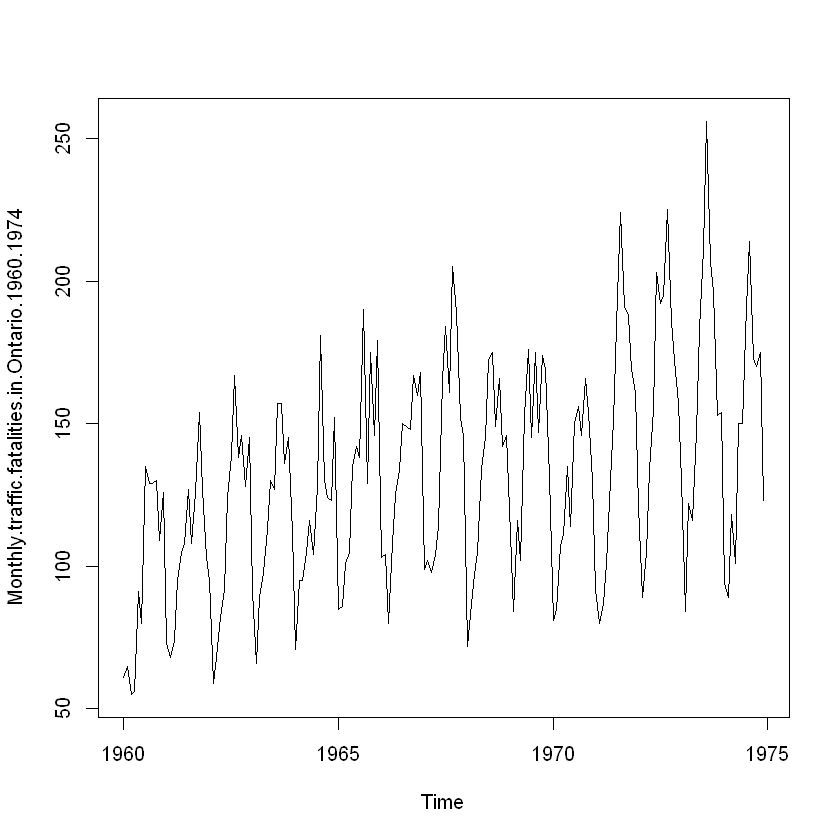

In [7]:
plot(accidentes)

#### Plotting con ggplot2 del training y test

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


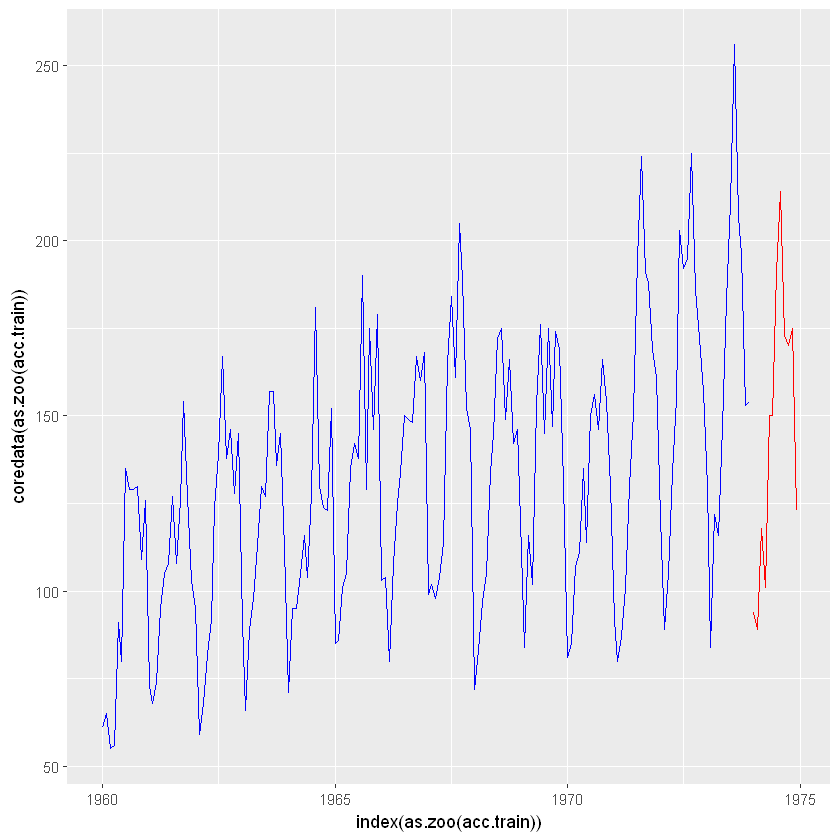

In [8]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train)), y = coredata(as.zoo(acc.train))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test))), col = 'red')
p

#### Función genérica para plotting de test vs pred a través de ggplot2

In [9]:
combine <- function(test, pred) {
  require(ggplot2)
  p <- ggplot() +
    geom_line(aes(x = index(as.zoo(test)), y = coredata(as.zoo(test)), colour = 'Test')) +
    geom_line(aes(x = index(as.zoo(acc.test)), y = pred, colour = 'Prediccion')) +
    scale_color_manual(name = '', values = c('Test' = 'black', 'Prediccion' = 'red'),
                       labels = c('Test','Predicción')) + ylab('Número de accidentes de tráfico') +
    xlab('Año 1974') + scale_x_continuous(breaks = c(), labels = c())
  p
}

#### Frecuencia estacional de nuestros datos

In [10]:
findfrequency(x = acc.train)

[1] 12

In [11]:
monthdays(x = acc.train)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960  31  29  31  30  31  30  31  31  30  31  30  31
1961  31  28  31  30  31  30  31  31  30  31  30  31
1962  31  28  31  30  31  30  31  31  30  31  30  31
1963  31  28  31  30  31  30  31  31  30  31  30  31
1964  31  29  31  30  31  30  31  31  30  31  30  31
1965  31  28  31  30  31  30  31  31  30  31  30  31
1966  31  28  31  30  31  30  31  31  30  31  30  31
1967  31  28  31  30  31  30  31  31  30  31  30  31
1968  31  29  31  30  31  30  31  31  30  31  30  31
1969  31  28  31  30  31  30  31  31  30  31  30  31
1970  31  28  31  30  31  30  31  31  30  31  30  31
1971  31  28  31  30  31  30  31  31  30  31  30  31
1972  31  29  31  30  31  30  31  31  30  31  30  31
1973  31  28  31  30  31  30  31  31  30  31  30  31

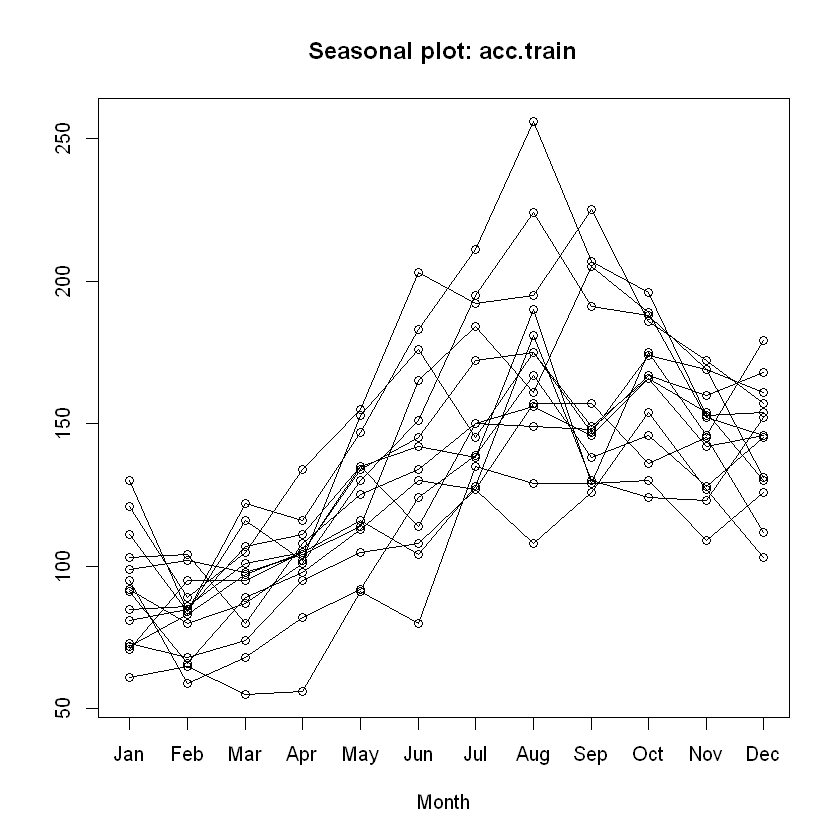

In [12]:
seasonplot(x = acc.train, s = 12)

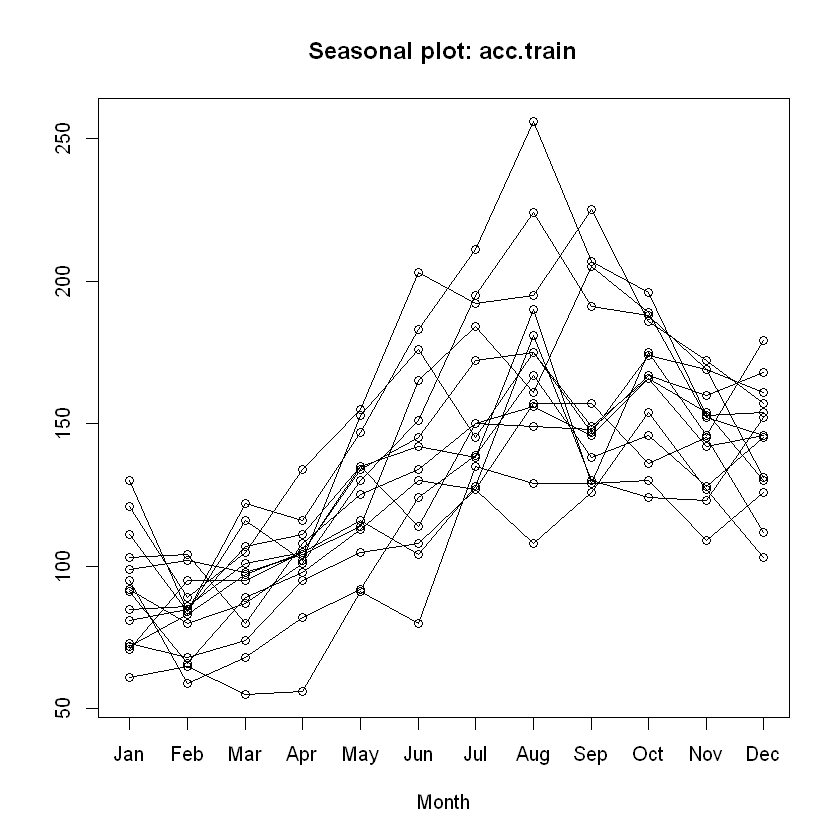

In [13]:
seasonplot(x = acc.train, s = findfrequency(acc.train))

#### Descomposición de una serie temporal e independencia de los residuos (STATS PACKAGE)

In [14]:
acc.train.decomp <- decompose(x = acc.train, type = 'multiplicative')
seasonal(object = acc.train.decomp)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1960 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1961 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1962 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1963 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1964 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1965 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1966 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1967 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1968 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1969 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1970 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1971 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1972 0.7148019 0.6338028 

In [15]:
trendcycle(object = acc.train.decomp)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1960        NA        NA        NA        NA        NA        NA  97.66667
1961 106.41667 105.20833 104.20833 105.08333 106.83333 106.62500 106.58333
1962 105.91667 108.87500 111.83333 112.00000 111.70833 113.50000 115.08333
1963 120.33333 119.41667 119.79167 120.16667 120.45833 119.79167 117.58333
1964 118.37500 119.41667 119.29167 117.66667 116.25000 117.00000 119.25000
1965 124.75000 125.54167 125.87500 127.95833 131.04167 133.12500 135.00000
1966 134.75000 133.54167 132.62500 133.08333 133.33333 133.45833 132.83333
1967 136.75000 138.66667 141.54167 144.83333 145.41667 144.16667 142.12500
1968 138.91667 139.00000 137.25000 133.95833 132.58333 132.16667 133.79167
1969 139.87500 138.75000 138.66667 138.91667 140.37500 140.87500 139.00000
1970 131.37500 130.79167 129.95833 129.58333 128.62500 127.95833 128.37500
1971 130.45833 135.16667 139.87500 142.66667 144.20833 146.12500 148.62500
1972 161.12500 159.79167 

In [16]:
remainder(object = acc.train.decomp)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1960        NA        NA        NA        NA        NA        NA 1.1701849
1961 0.9596823 1.0197756 0.9898977 1.1414200 1.0318648 0.9457493 1.0087453
1962 1.2547973 0.8550070 0.8476151 0.9243822 0.8646543 1.0200869 1.0225144
1963 1.0579612 0.8720168 1.0356773 1.0296694 0.9848767 1.0132768 0.9143765
1964 0.8390979 1.2551756 1.1101318 1.1266566 1.0476236 0.8299632 0.9086961
1965 0.9532189 1.0808275 1.1185179 1.0360398 1.0815949 0.9959558 0.8653910
1966 1.0693570 1.2287468 0.8408638 1.0246035 0.9842639 0.9374982 0.9559854
1967 1.0127964 1.1605769 0.9651678 0.9066101 0.8230589 1.0686375 1.0960098
1968 0.7250909 0.9421263 0.9851910 0.9896356 1.0610996 1.0243713 1.0883447
1969 1.1101896 0.9551952 1.1661300 0.9270466 1.1443053 1.1665143 0.8831211
1970 0.8625546 1.0253796 1.1477326 1.0815076 1.1019164 0.8318550 0.9891858
1971 0.9865754 0.9338266 0.8670421 0.8938293 0.9464404 0.9648588 1.1107334
1972 1.0505984 0.8787831 

In [17]:
Box.test(x = acc.train.decomp$random, type = 'Ljung-Box') # Son ruido blanco


	Box-Ljung test

data:  acc.train.decomp$random
X-squared = 0.088749, df = 1, p-value = 0.7658


#### Desestacionalización a través de objectos decompose

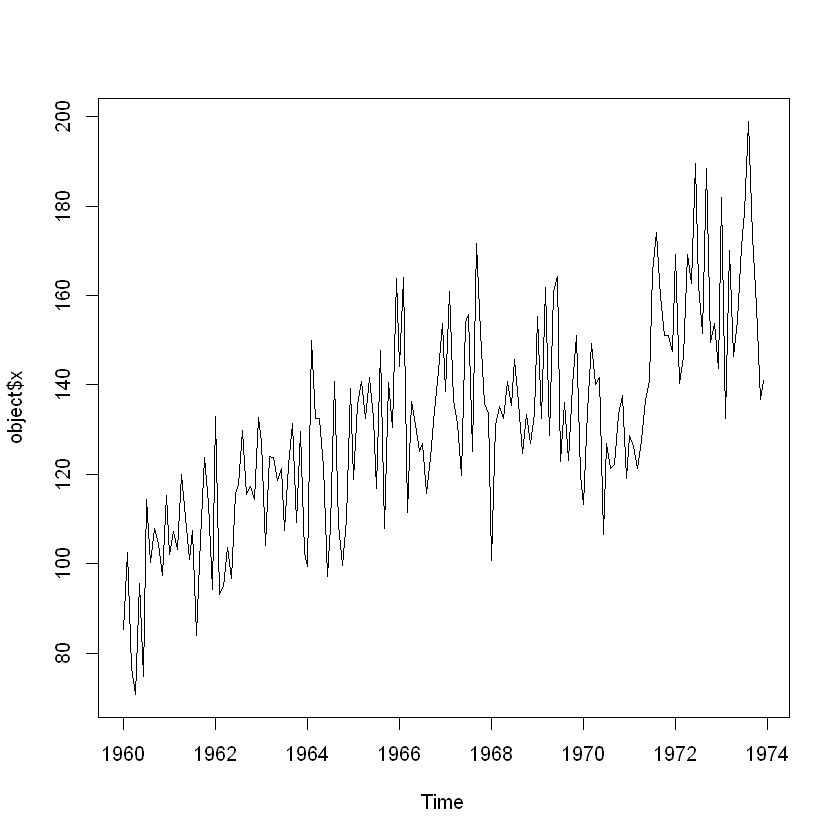

In [18]:
acc.train.seasadj <- seasadj(acc.train.decomp)
plot(acc.train.seasadj)

In [19]:
ndiffs(acc.train.seasadj, test = 'kpss') # 1

[1] 1

In [20]:
ndiffs(acc.train.seasadj, test = 'adf') # 0

[1] 0

In [21]:
ndiffs(acc.train.seasadj, test = 'pp') # 0

[1] 0

#### Visualizando la tendencia

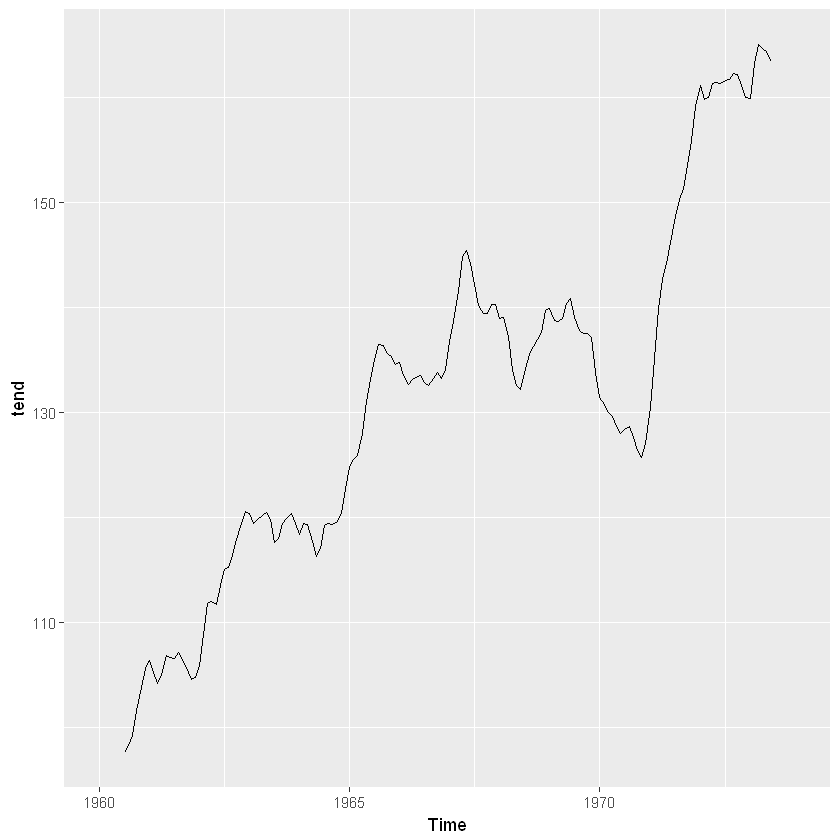

In [22]:
tend <- ma(acc.train, order = 12)
autoplot(tend)

<br>

#### Prediciendo nuevos valores con la media

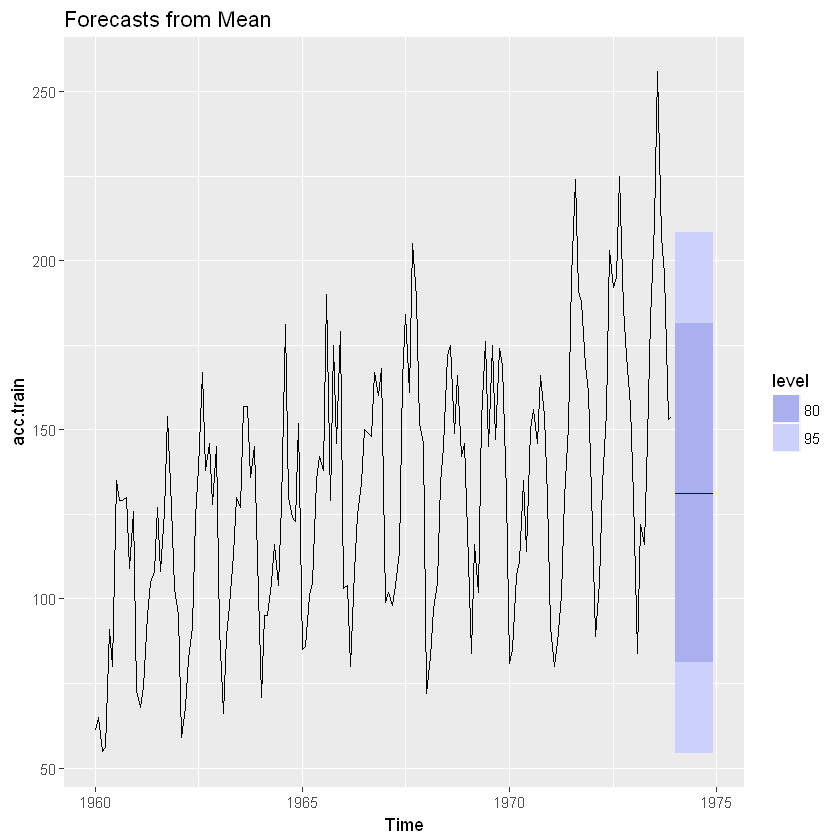

In [23]:
model <- meanf(acc.train, h = 12)
autoplot(model)

In [24]:
model$mean[1] == mean(acc.train) # TRUE

[1] TRUE

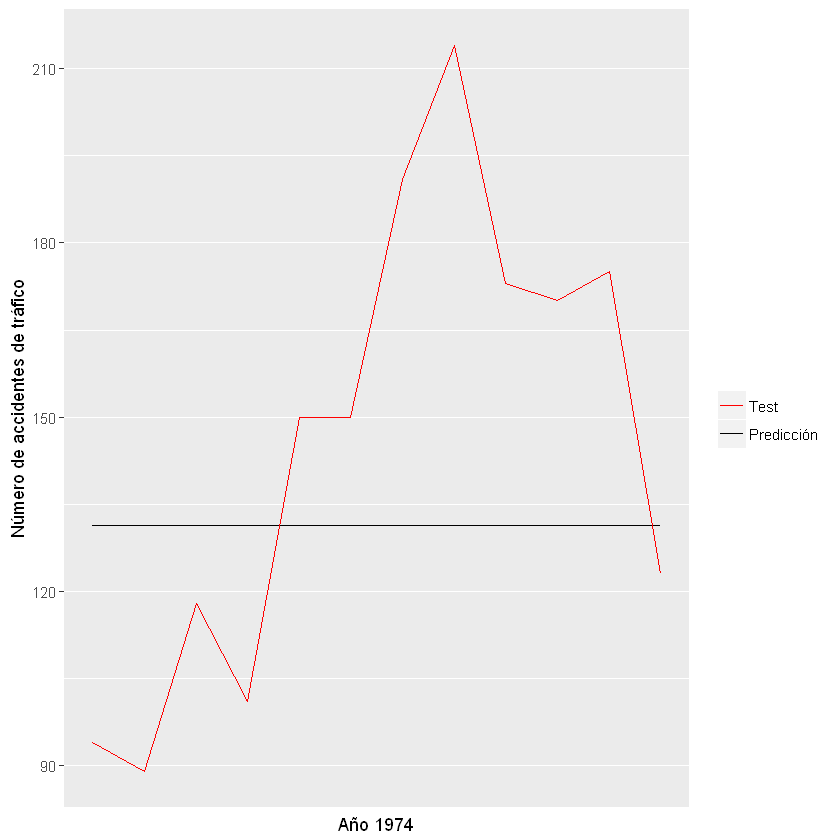

In [25]:
combine(model$mean, acc.test)

In [26]:
# Medimos la precisión del modelo
accuracy(model, acc.test) # 36.28770

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.392491e-15,38.73302,31.48058,-10.085477,27.71539,1.774836,0.7359523,NA
Test set,1.439286e+01,41.43521,36.28770,2.639993,25.15689,2.045855,0.6310518,1.205019


In [27]:
# Revisamos los residuos
Box.test(model$residuals, lag = 12, type = 'Ljung-Box')


	Box-Ljung test

data:  model$residuals
X-squared = 393.45, df = 12, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from Mean
Q* = 687.35, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



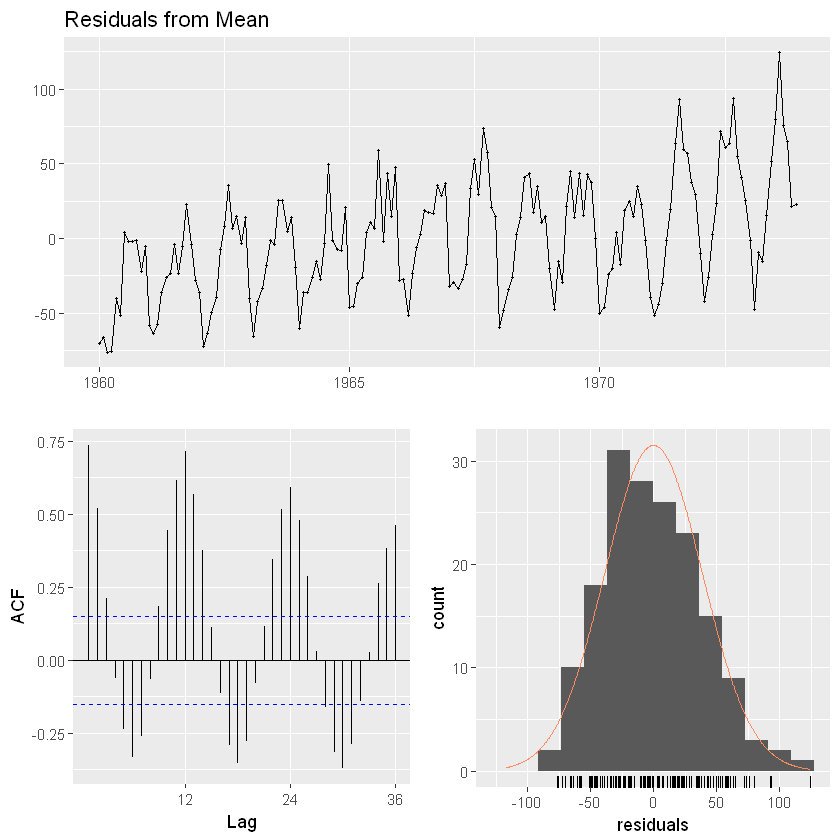

In [28]:
checkresiduals(model) # No son ruido blanco

<br>

####  Modelo ingenuo en el que se predice con el valor anterior observado

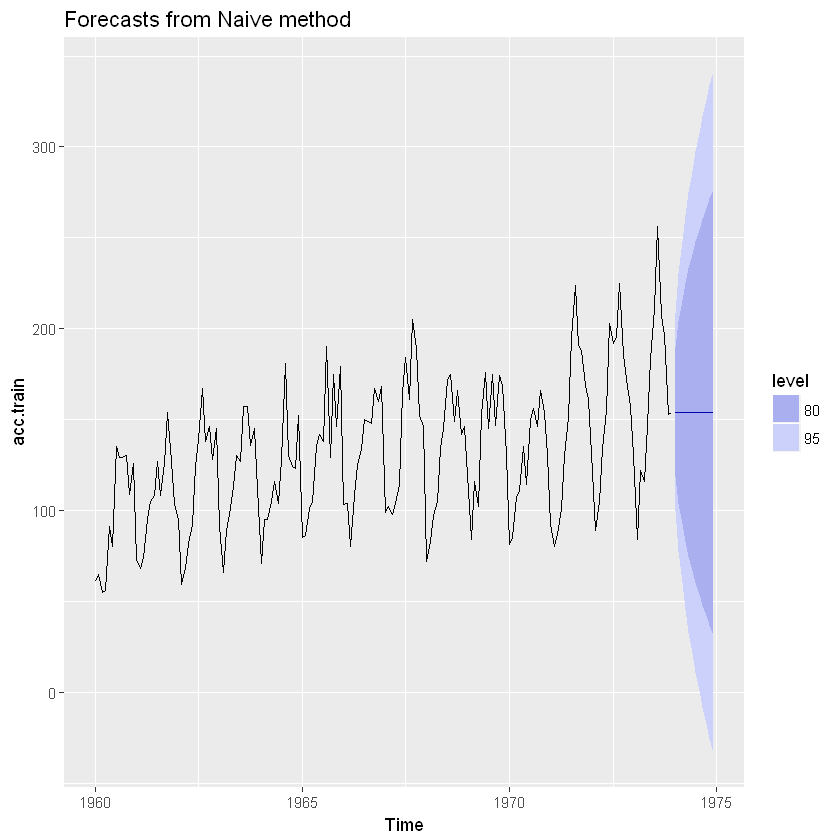

In [29]:
model <- naive(acc.train, h = 12)
autoplot(model)

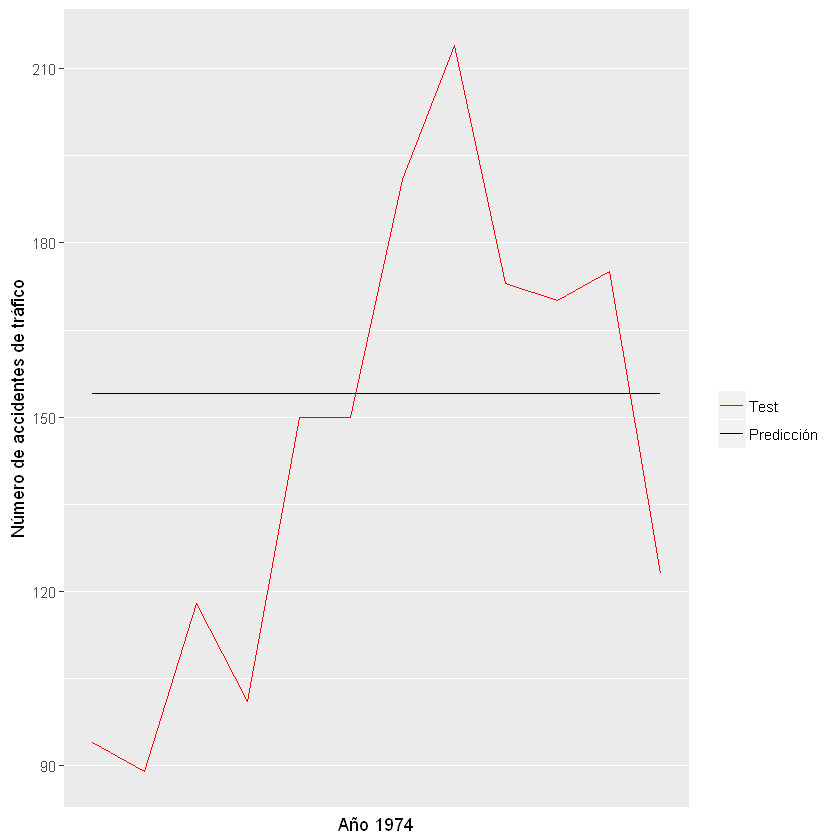

In [30]:
combine(model$mean, acc.test)

In [31]:
accuracy(model, acc.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.5568862,27.64694,22.16168,-2.030101,18.18006,1.249448,-0.09178492,NA
Test set,-8.3333333,39.73873,33.83333,-14.215022,27.51561,1.907481,0.63105182,1.356633



	Ljung-Box test

data:  Residuals from Naive method
Q* = 163.84, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



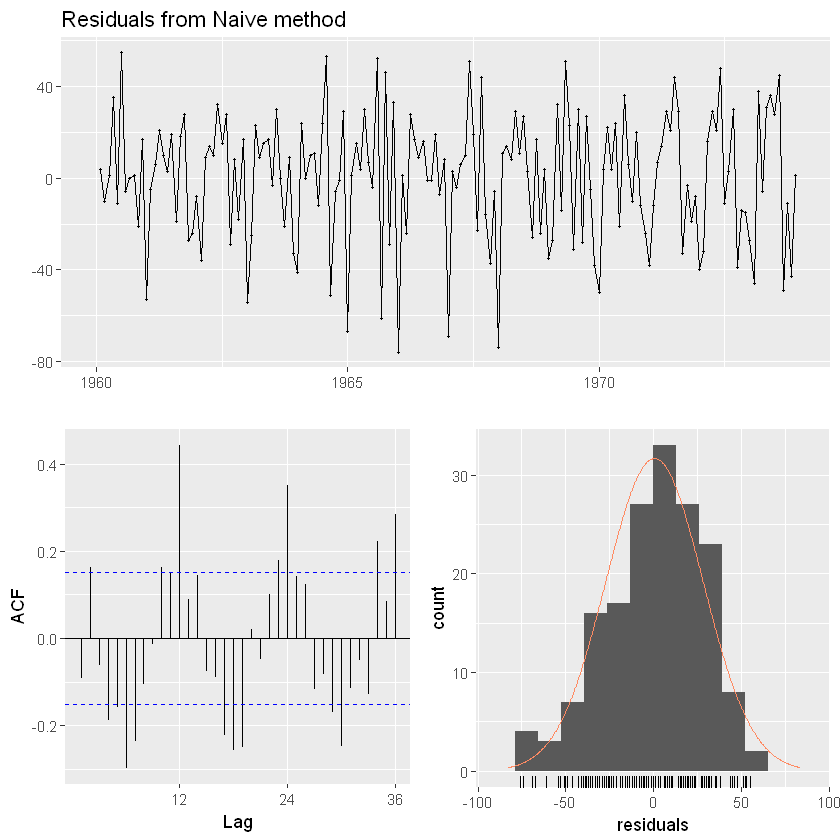

In [32]:
checkresiduals(model)

<br>

####  Modelo ingenuo en el que se predice con el valor anterior observado con constante != 0

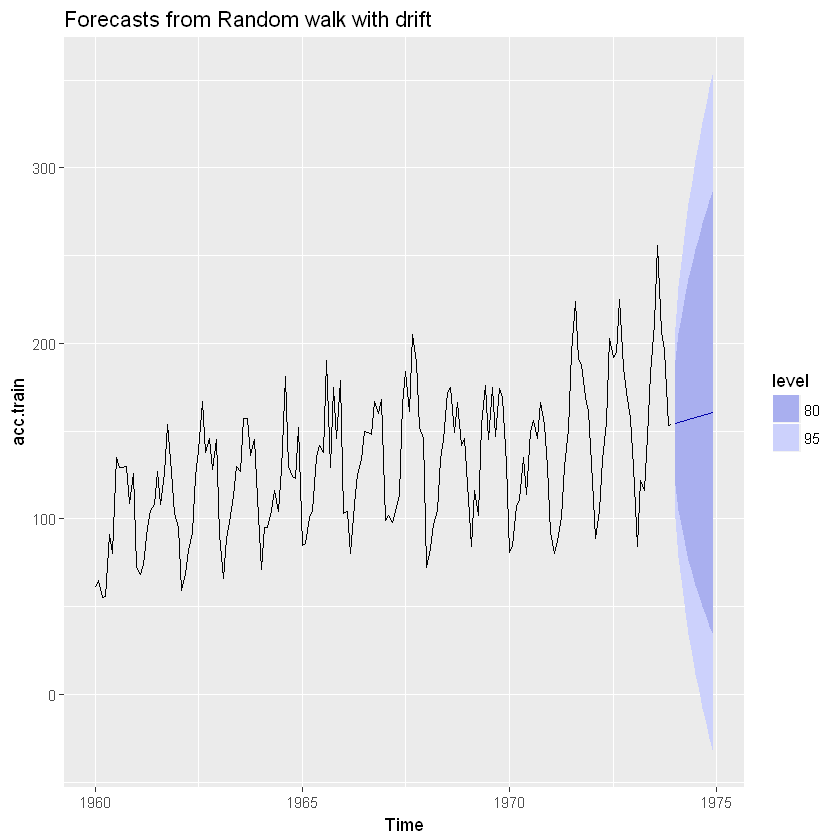

In [33]:
model <- rwf(acc.train, h = 12, drift = TRUE)
autoplot(model)

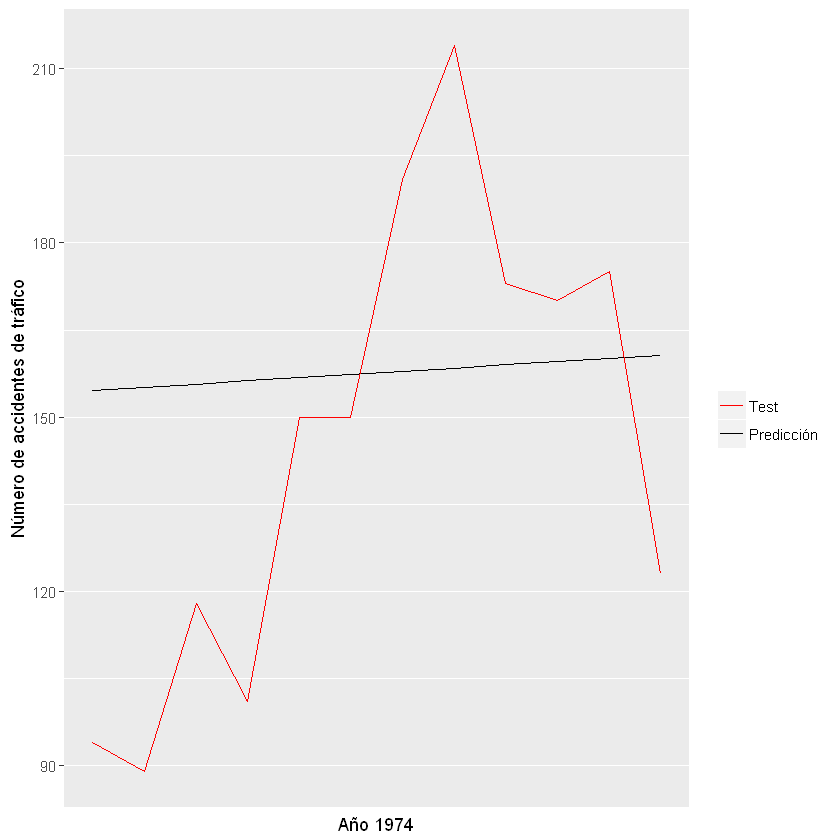

In [34]:
combine(model$mean, acc.test)

In [35]:
accuracy(model, acc.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.382040e-15,27.64133,22.09832,-2.494433,18.14887,1.245876,-0.09178492,NA
Test set,-1.195309e+01,39.51151,33.27645,-16.613199,27.61444,1.876084,0.61278154,1.373421



	Ljung-Box test

data:  Residuals from Random walk with drift
Q* = 163.84, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



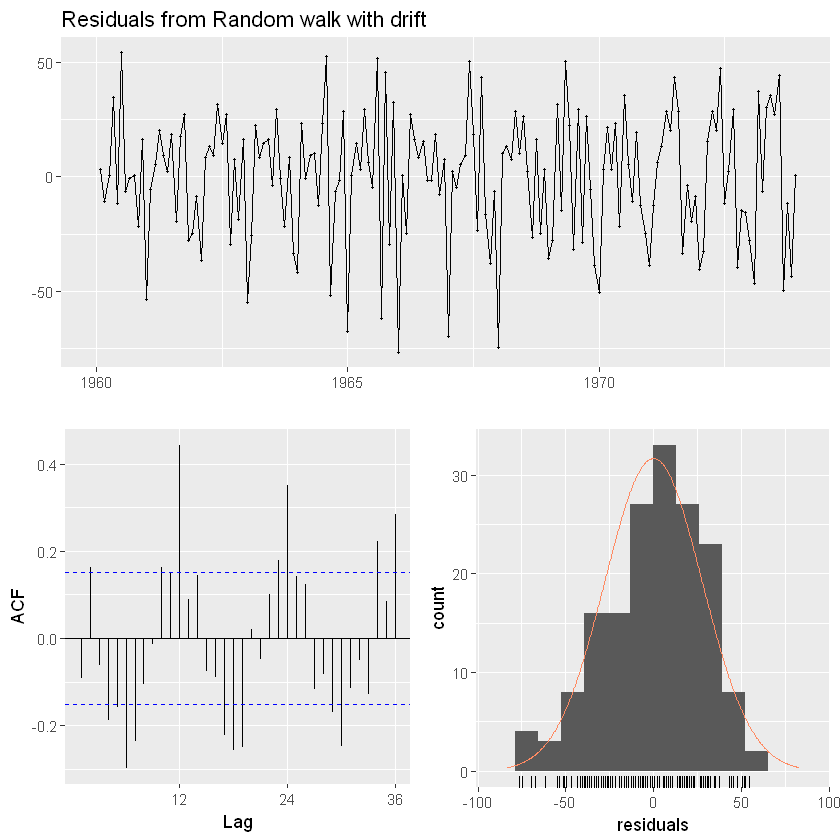

In [36]:
checkresiduals(model)

<br>

#### Modelo ingenuo que tiene en cuenta la estacionalidad

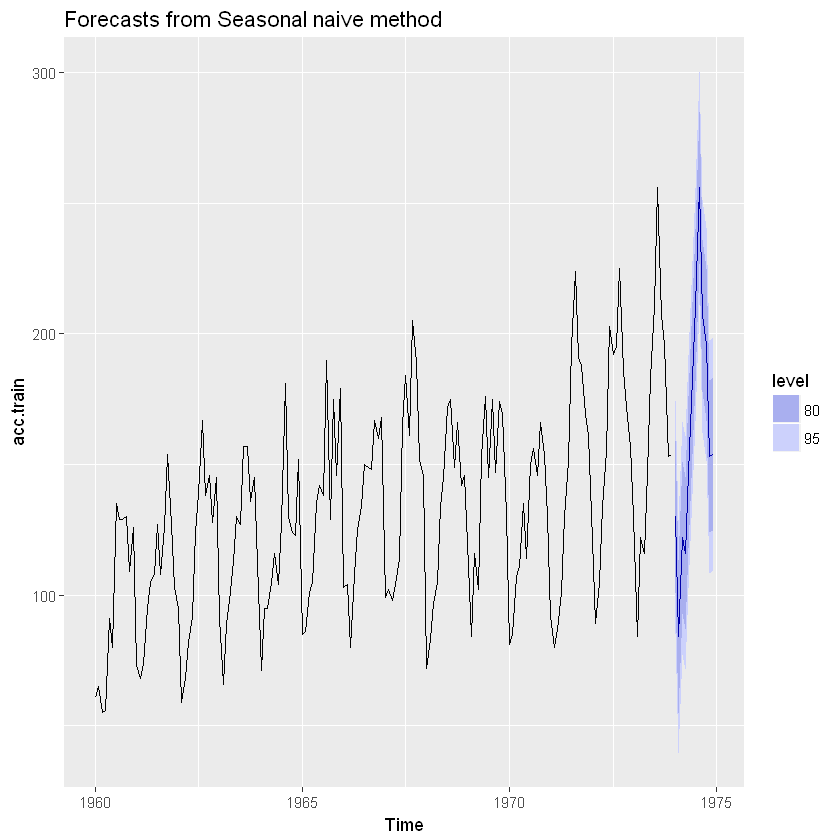

In [37]:
model <- snaive(acc.train, h = 12)
autoplot(model)

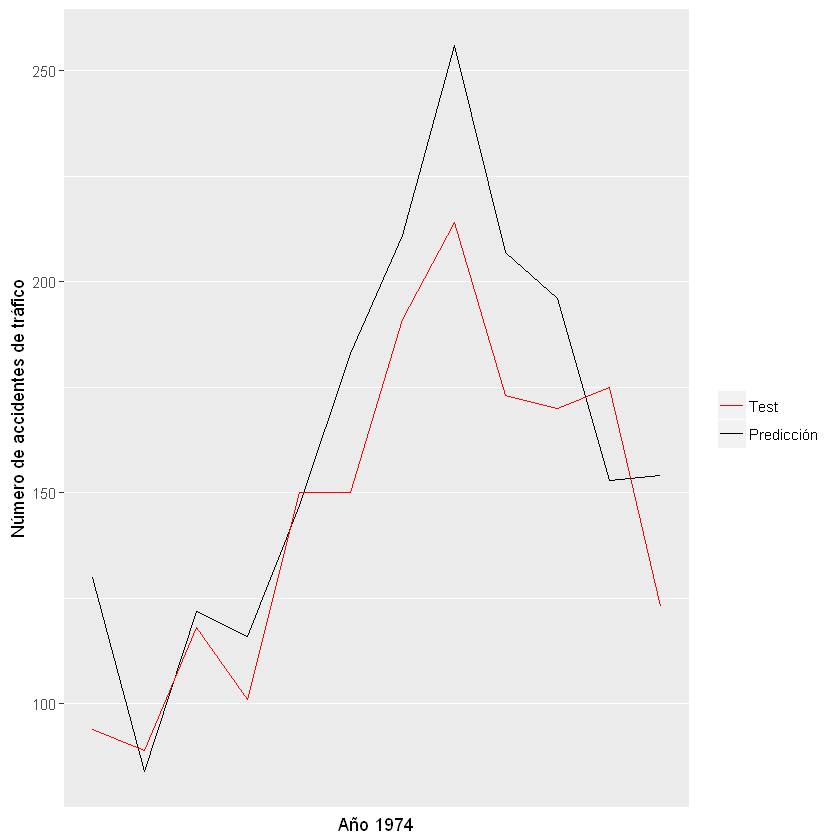

In [38]:
combine(model$mean, acc.test)

In [39]:
accuracy(model, acc.test) # 22.58333

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.083333,22.73608,17.73718,2.63632,13.39306,1.00000,0.2149960,NA
Test set,-17.583333,25.98237,22.58333,-12.38314,15.74804,1.27322,-0.1291698,0.6326959



	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 67.02, df = 24, p-value = 6.124e-06

Model df: 0.   Total lags used: 24



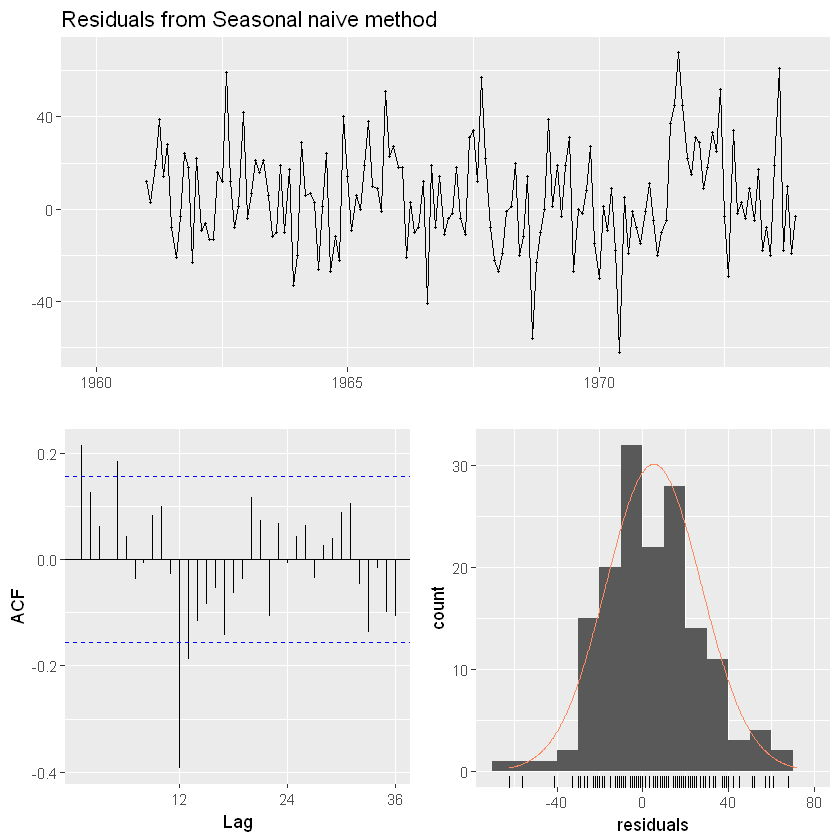

In [40]:
checkresiduals(model) # No son ruido blanco

<br>

#### Ajuste de un modelo lineal con tendencia y estacionalidad a los datos

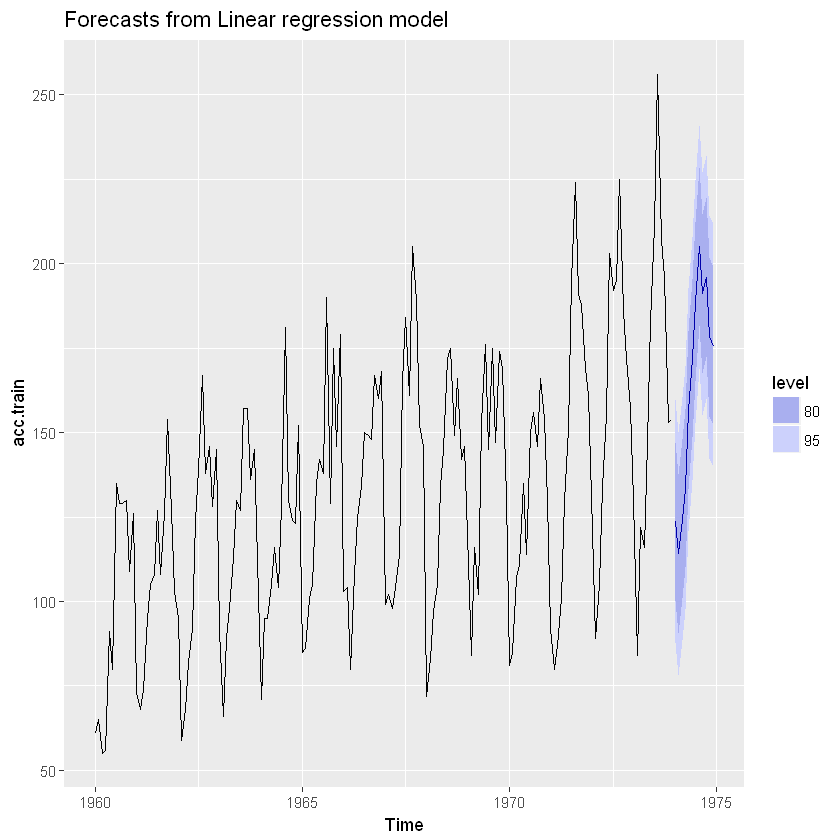

In [41]:
model <- tslm(acc.train ~ trend + season)
pred <- forecast(model, h = 12)
autoplot(pred)

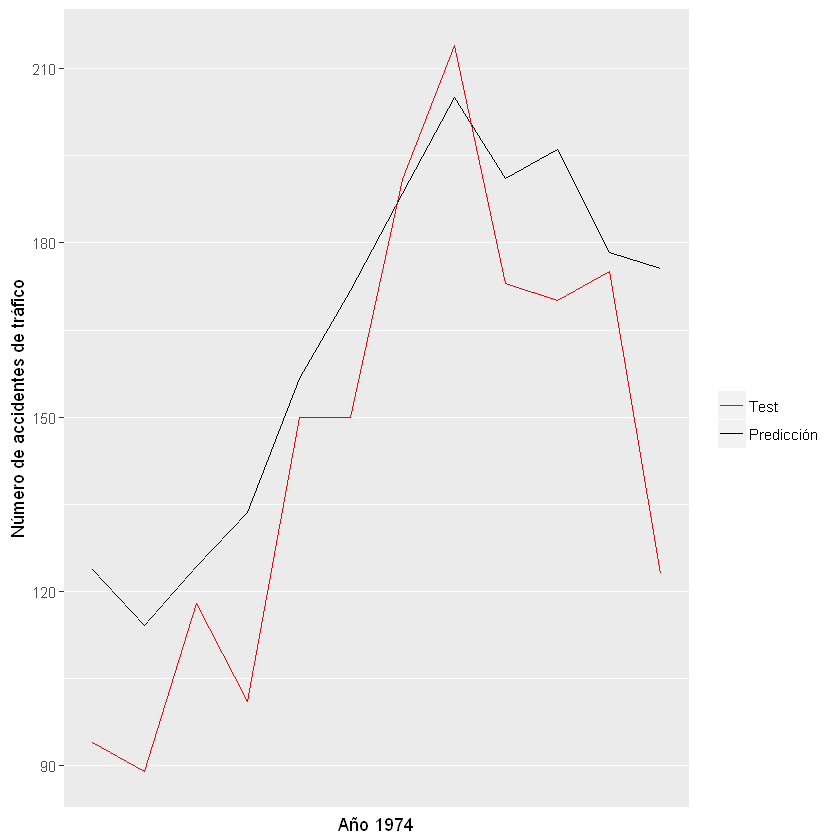

In [42]:
combine(pred$mean, acc.test)

In [43]:
accuracy(pred, acc.test) # 19.44597

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.915820e-16,16.74843,13.22338,-1.44082,10.6025,0.7455175,0.2861346,NA
Test set,-1.754396e+01,24.12901,19.44597,-15.09621,16.0077,1.0963395,-0.1685237,0.7191841



	Breusch-Godfrey test for serial correlation of order up to 24

data:  Residuals from Linear regression model
LM test = 40.029, df = 24, p-value = 0.02123



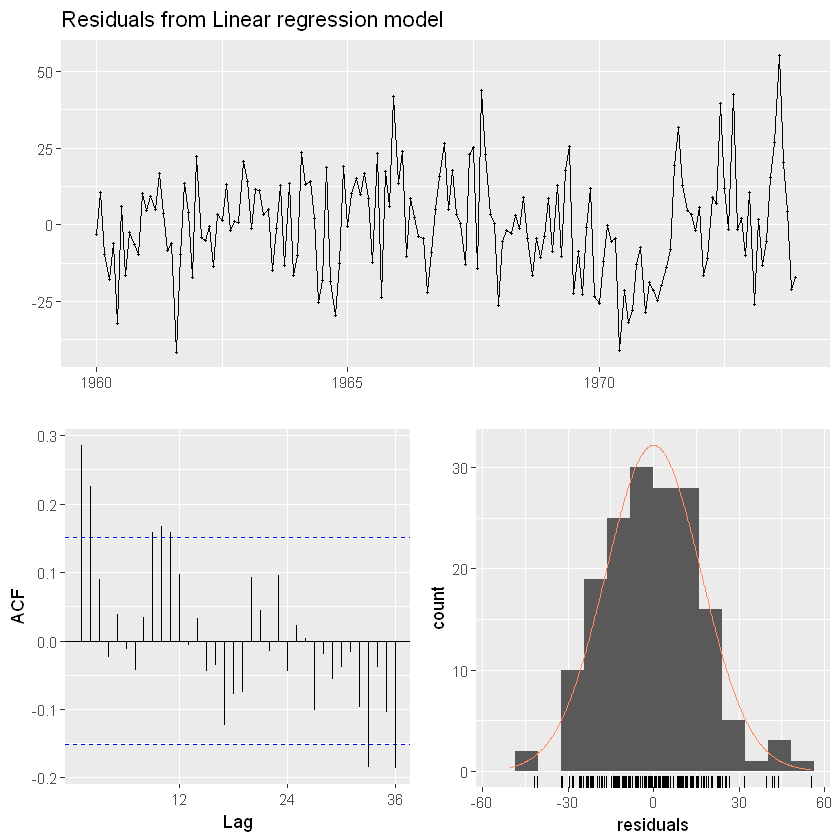

In [44]:
checkresiduals(model) # No son ruido blanco

<br>

#### Damped HoltWinters Mutiplicativo

In [45]:
model <- hw(acc.train, h = 12, damped = TRUE, seasonal = 'multiplicative',
            initial = 'optimal') 
summary(model)


Forecast method: Damped Holt-Winters' multiplicative method

Model Information:
Damped Holt-Winters' multiplicative method 

Call:
 hw(y = acc.train, h = 12, seasonal = "multiplicative", damped = TRUE,  

 Call:
     initial = "optimal") 

  Smoothing parameters:
    alpha = 0.1708 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.9623 

  Initial states:
    l = 91.5624 
    b = 1.1674 
    s=1.0753 1.0927 1.2404 1.219 1.3265 1.1952
           1.08 0.9561 0.7764 0.7078 0.622 0.7086

  sigma:  0.1213

     AIC     AICc      BIC 
1810.221 1814.812 1866.452 

Error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 1.113903 16.03383 12.68223 -0.4267724 9.854084 0.7150085
                   ACF1
Training set 0.08131717

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 1974       112.4506  94.97204 129.9293  85.71942 139.1819
Feb 1974        98.7101  83.14161 114.2786  74.90015 122.5201
Mar 1974       112.3351  94.36

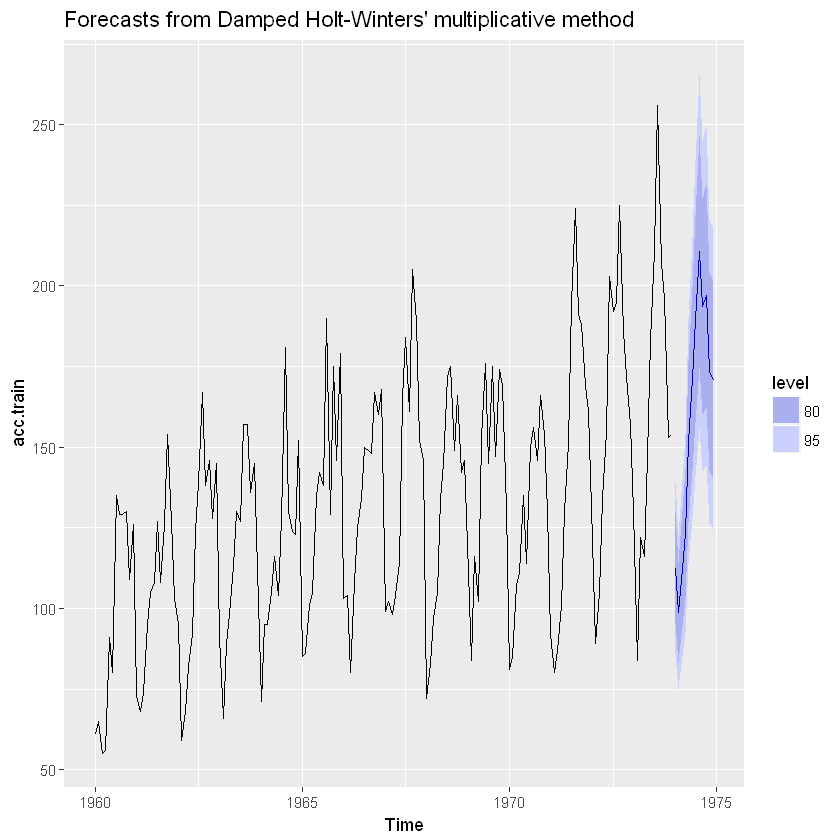

In [46]:
autoplot(model)

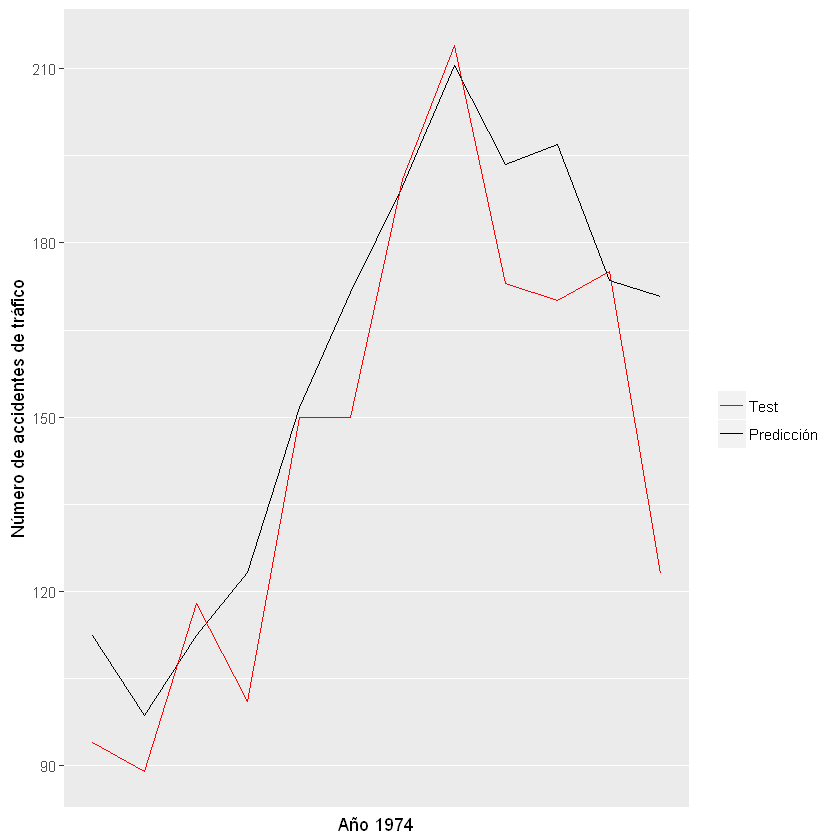

In [47]:
combine(model$mean, acc.test)

In [48]:
accuracy(model, acc.test) # 15.04762

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.113903,16.03383,12.68223,-0.4267724,9.854084,0.7150085,0.08131717,NA
Test set,-13.063209,20.12153,15.04762,-10.5419375,11.866680,0.8483659,-0.33286407,0.5553684



	Ljung-Box test

data:  Residuals from Damped Holt-Winters' multiplicative method
Q* = 30.474, df = 7, p-value = 7.771e-05

Model df: 17.   Total lags used: 24



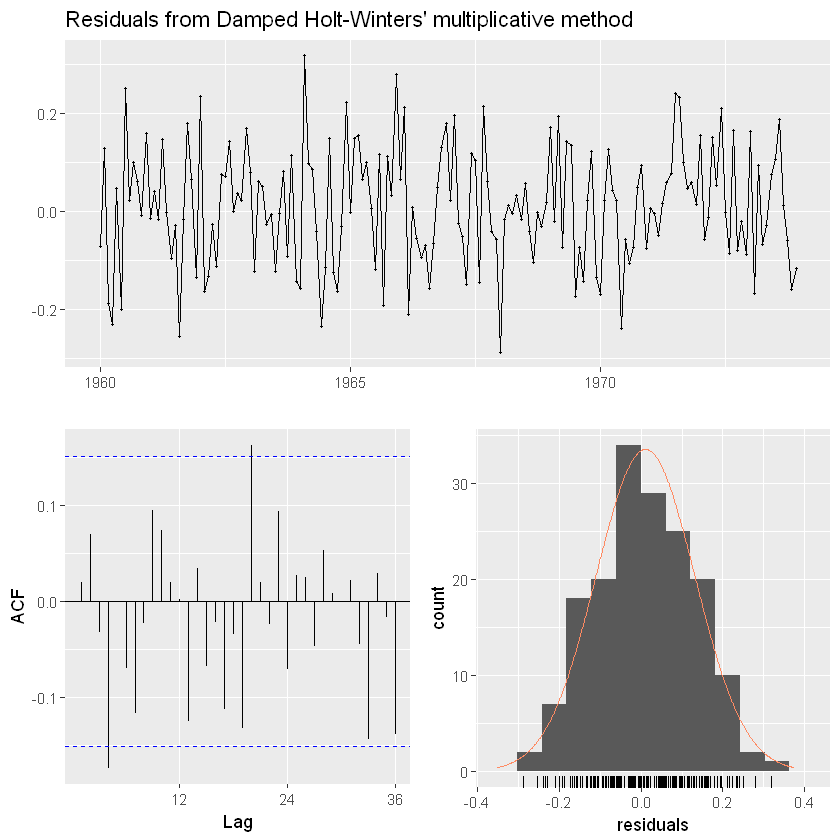

In [49]:
checkresiduals(model) # No son ruido blanco

<br>

#### Damped HoltWinters Aditivo

In [50]:
model <- hw(acc.train, h = 12, damped = TRUE, seasonal = 'additive',
            initial = 'optimal') 
summary(model)


Forecast method: Damped Holt-Winters' additive method

Model Information:
Damped Holt-Winters' additive method 

Call:
 hw(y = acc.train, h = 12, seasonal = "additive", damped = TRUE,  

 Call:
     initial = "optimal") 

  Smoothing parameters:
    alpha = 0.1554 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 96.756 
    b = 0.9626 
    s=12.2488 15.3994 32.0652 26.1953 39.3466 23.8066
           10.2433 -7.4994 -27.8994 -37.4982 -48.5355 -37.8727

  sigma:  16.6449

     AIC     AICc      BIC 
1841.693 1846.284 1897.925 

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.7614963 16.64493 12.92584 -0.7276908 10.16514 0.7287425
                  ACF1
Training set 0.1495718

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 1974       124.4986 103.16726 145.8299  91.87514 157.1221
Feb 1974       113.8763  92.28843 135.4641  80.86052 146.8920
Mar 1974       124.9507 103.10

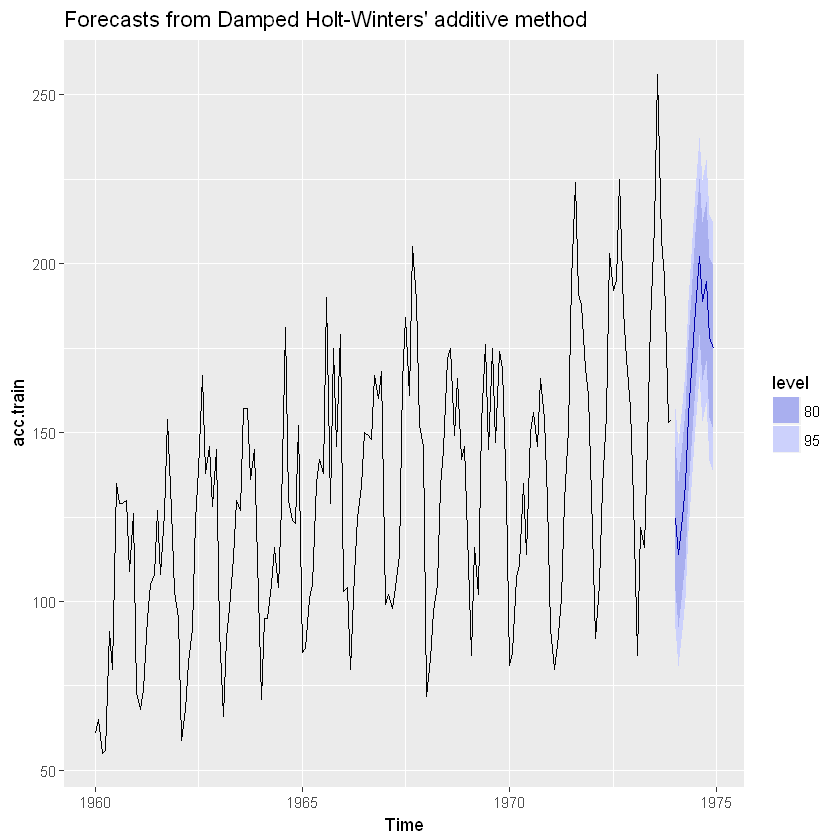

In [51]:
autoplot(model)

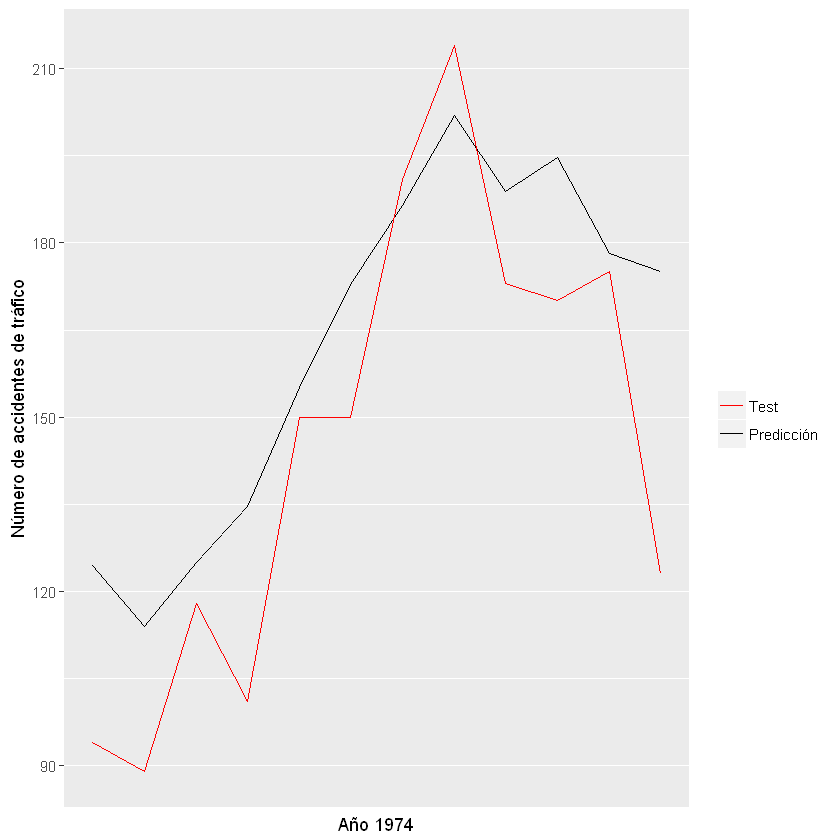

In [52]:
combine(model$mean, acc.test)

In [53]:
accuracy(model, acc.test) # 19.67722

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.7614963,16.64493,12.92584,-0.7276908,10.16514,0.7287425,0.1495718,NA
Test set,-16.9085766,24.18036,19.67722,-14.8238786,16.16072,1.1093768,-0.1338591,0.7216315



	Ljung-Box test

data:  Residuals from Damped Holt-Winters' additive method
Q* = 42.108, df = 7, p-value = 4.958e-07

Model df: 17.   Total lags used: 24



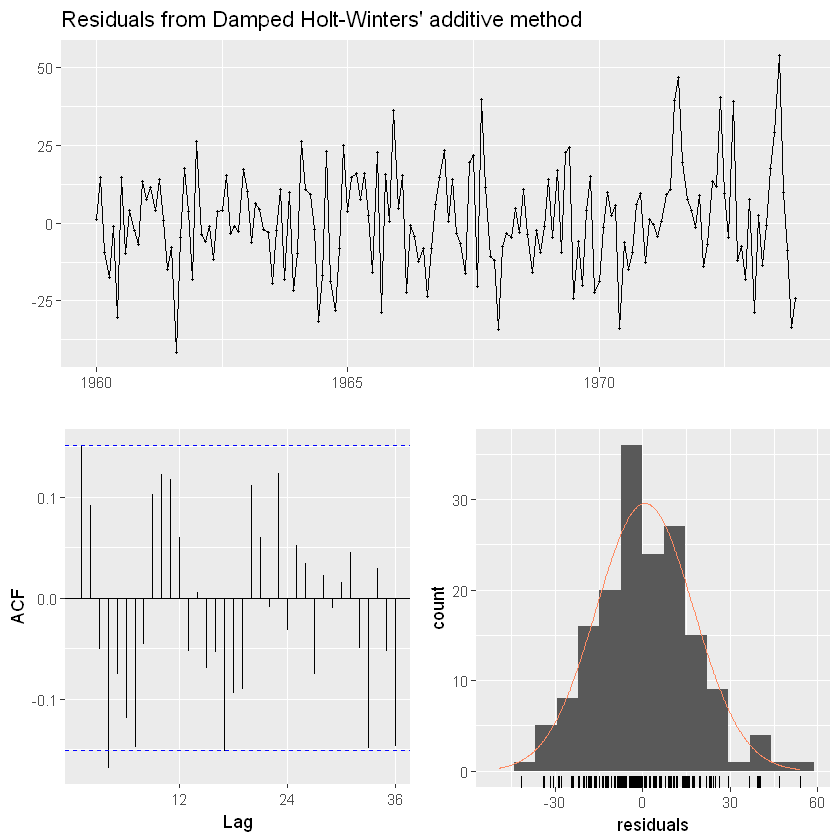

In [54]:
checkresiduals(model) # No son ruido blanco

<br>

#### Red Neuronal por defecto
##### (Las medidas de precisión pueden variar debido al caracter aleatorio de las redes neuronales)

In [55]:
model <- nnetar(acc.train)
pred <- forecast(model, h = 12)
summary(model)

          Length Class        Mode     
x         168    ts           numeric  
m           1    -none-       numeric  
p           1    -none-       numeric  
P           1    -none-       numeric  
scalex      2    -none-       list     
size        1    -none-       numeric  
subset    168    -none-       numeric  
model      20    nnetarmodels list     
nnetargs    0    -none-       list     
fitted    168    ts           numeric  
residuals 168    ts           numeric  
lags       12    -none-       numeric  
series      1    -none-       character
method      1    -none-       character
call        2    -none-       call     

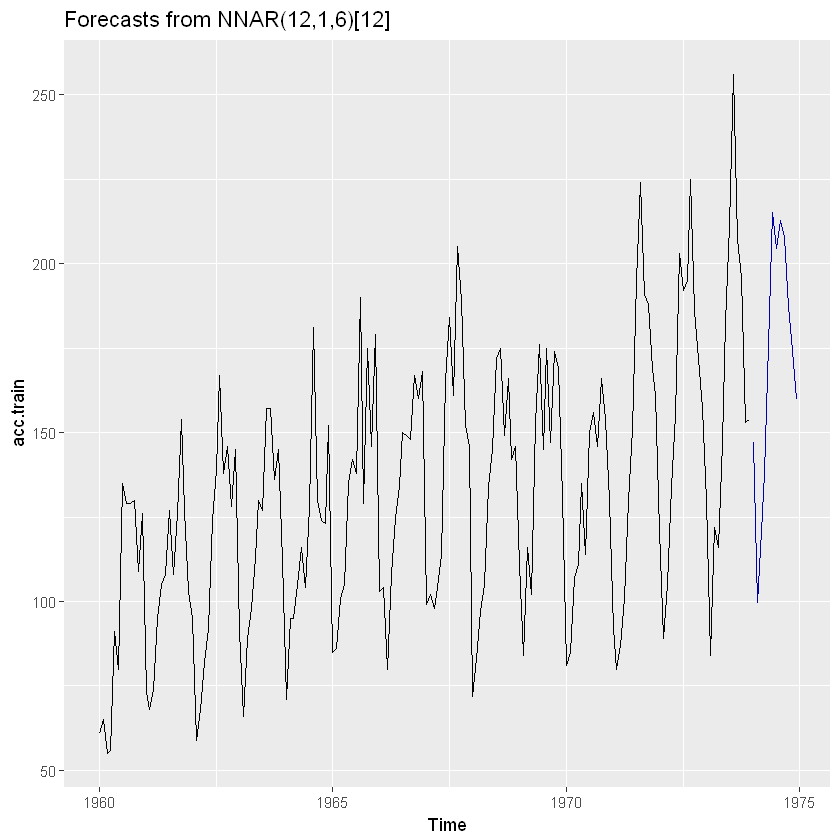

In [56]:
autoplot(pred)

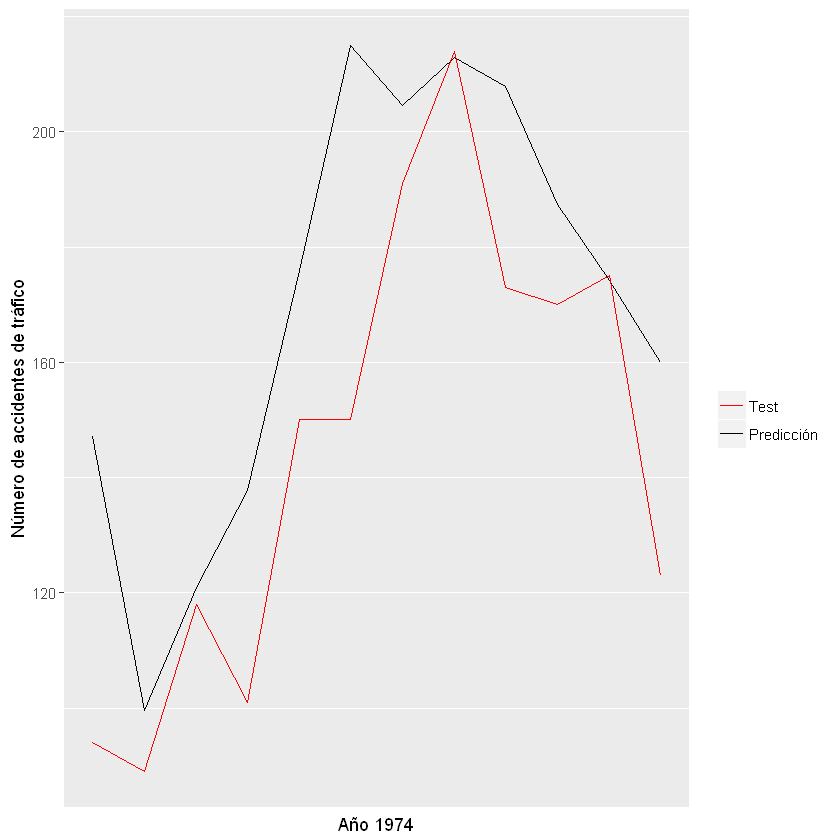

In [57]:
combine(pred$mean, acc.test)

In [58]:
accuracy(pred, acc.test) # 2.....

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.998899e-04,4.017304,2.809328,-0.3495488,2.221911,0.1583864,0.09058114,NA
Test set,-2.457928e+01,31.948693,24.907276,-19.5261271,19.692926,1.4042411,-0.18399955,0.8841918


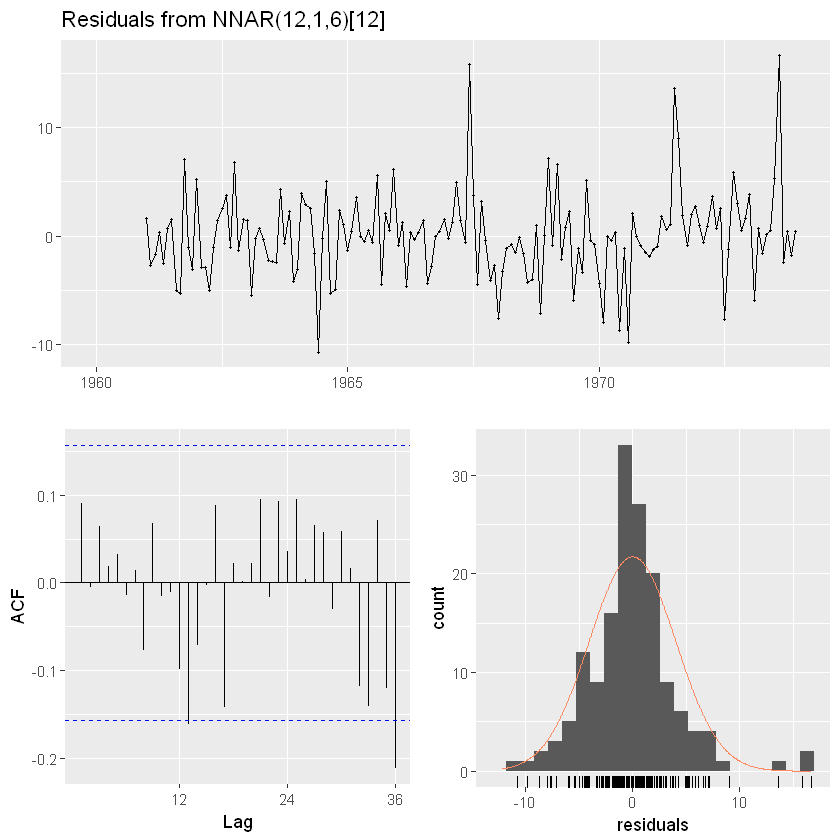

In [59]:
checkresiduals(model) # no hay grados de libertad

In [60]:
Box.test(model$residuals, lag = 12, type = 'Ljung-Box')


	Box-Ljung test

data:  model$residuals
X-squared = 5.7649, df = 12, p-value = 0.9275


<br>

#### Red Neuronal personalizada 1

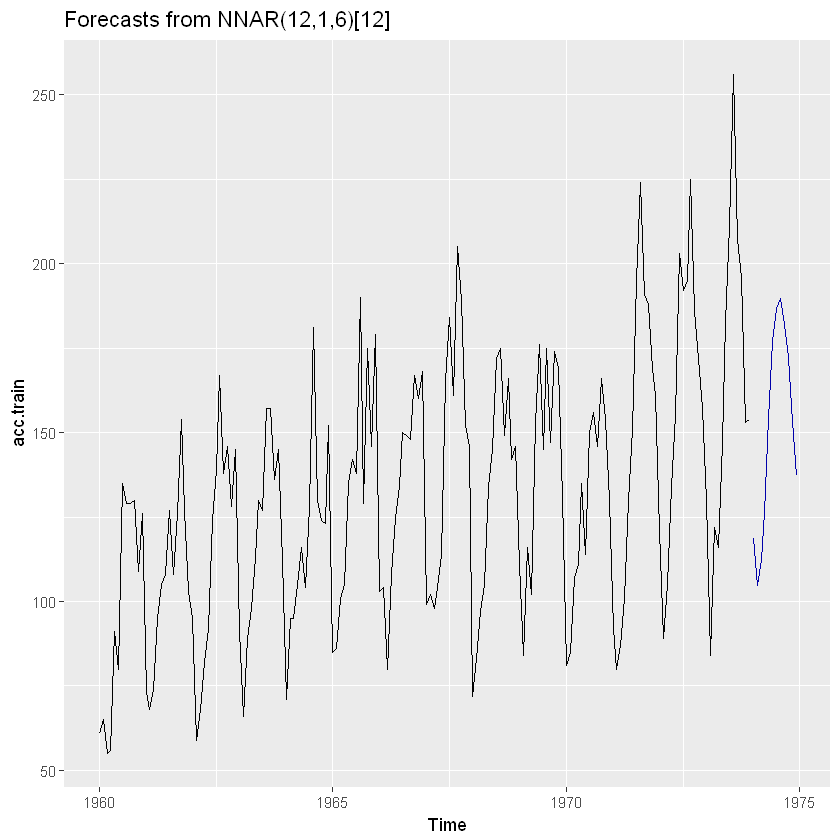

In [61]:
model <- nnetar(acc.train, decay = 9.5)
pred <- forecast(model, h = 12)
autoplot(pred)

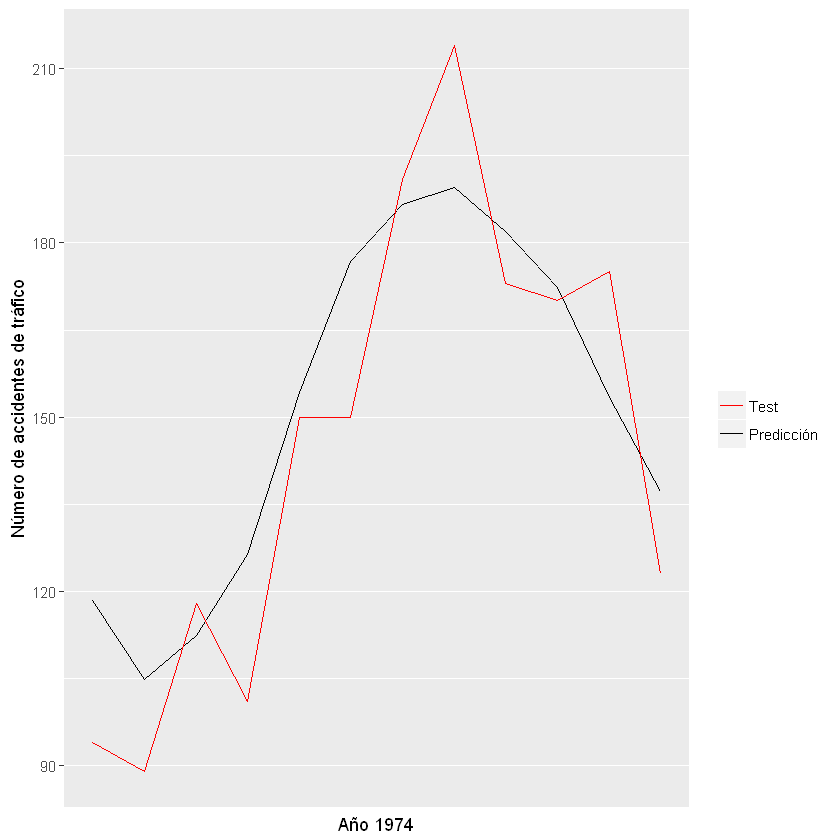

In [62]:
combine(pred$mean, acc.test)

In [63]:
accuracy(pred, acc.test) # 14....

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.02028603,19.83924,15.50192,-3.546541,12.58287,0.8739790,0.2159886,NA
Test set,-5.51946784,17.40485,14.86217,-6.413798,11.55225,0.8379104,-0.1129837,0.5153315


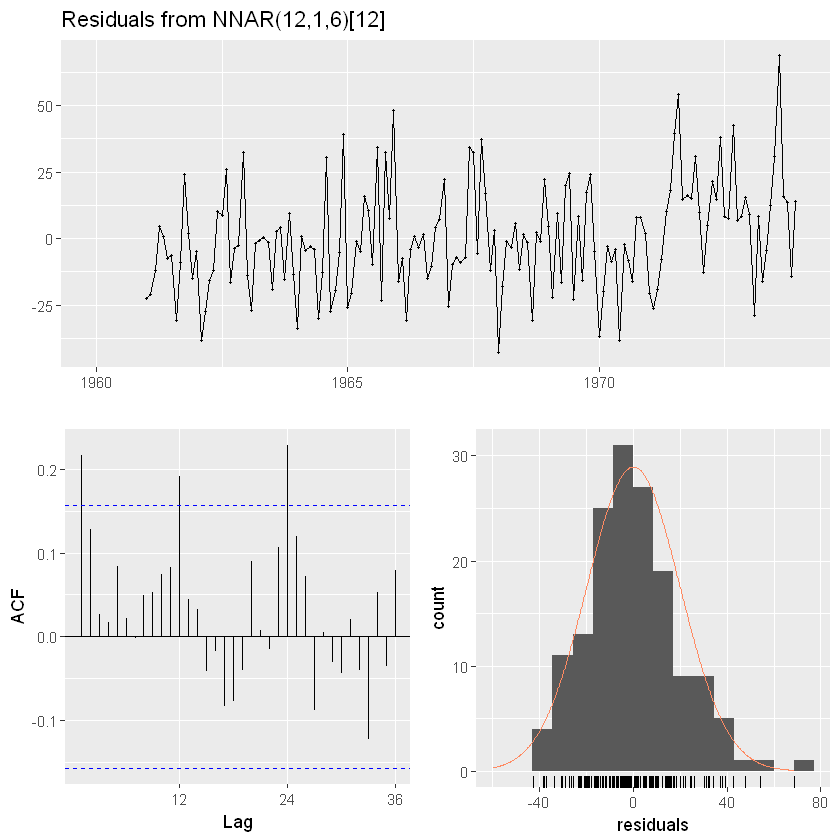

In [64]:
checkresiduals(model) # no hay grados de libertad

In [65]:
Box.test(model$residuals, lag = 12, type = 'Ljung-Box')


	Box-Ljung test

data:  model$residuals
X-squared = 20.646, df = 12, p-value = 0.05581


<br>

#### Red Neuronal personalizada 2

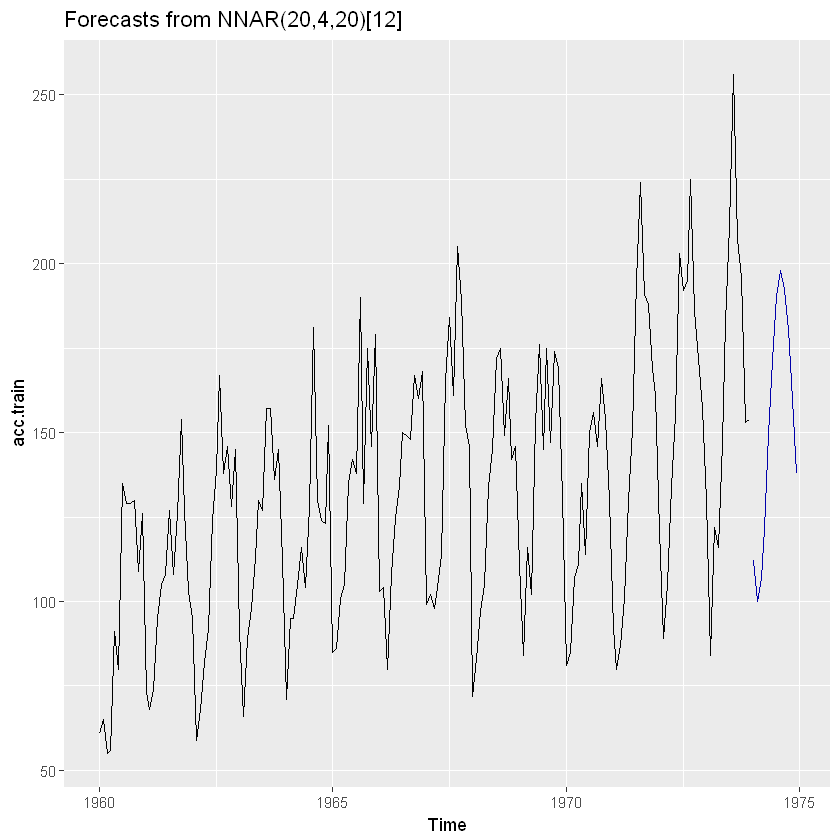

In [66]:
model <- nnetar(acc.train, repeats = 25, size = 20, decay = 9.5, p = 20, P = 4)
pred <- forecast(model, h = 12)
autoplot(pred)

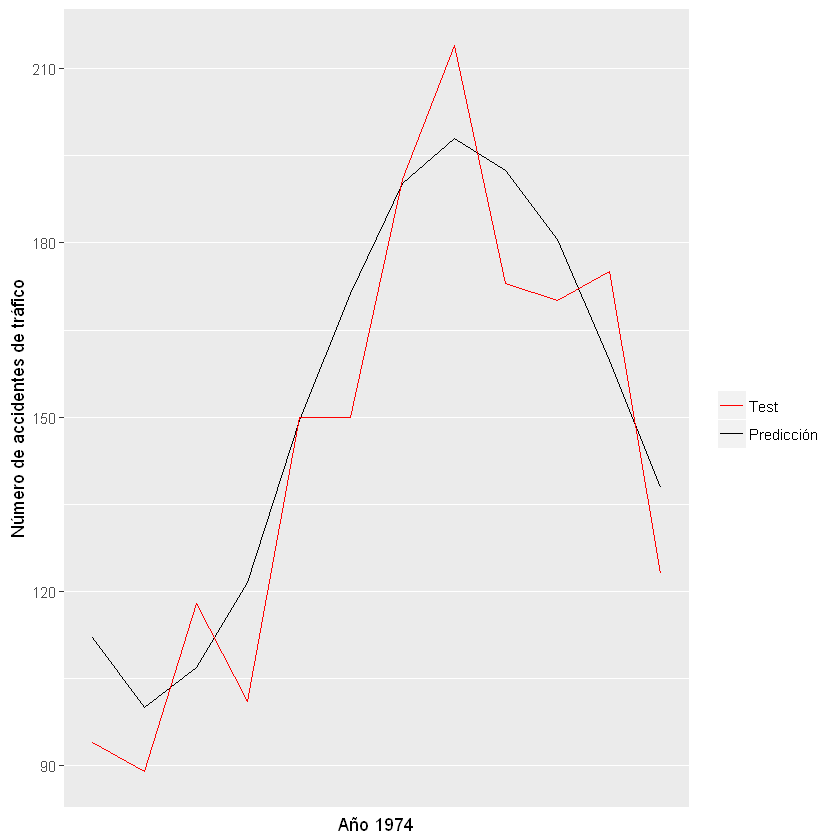

In [68]:
combine(pred$mean, acc.test)

In [70]:
accuracy(pred, acc.test) # 13....

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01133649,19.34198,15.18779,-2.897650,11.52953,0.8562686,0.1842188,NA
Test set,-5.98627951,14.83659,13.28955,-5.759116,10.16646,0.7492484,-0.4267832,0.4424861


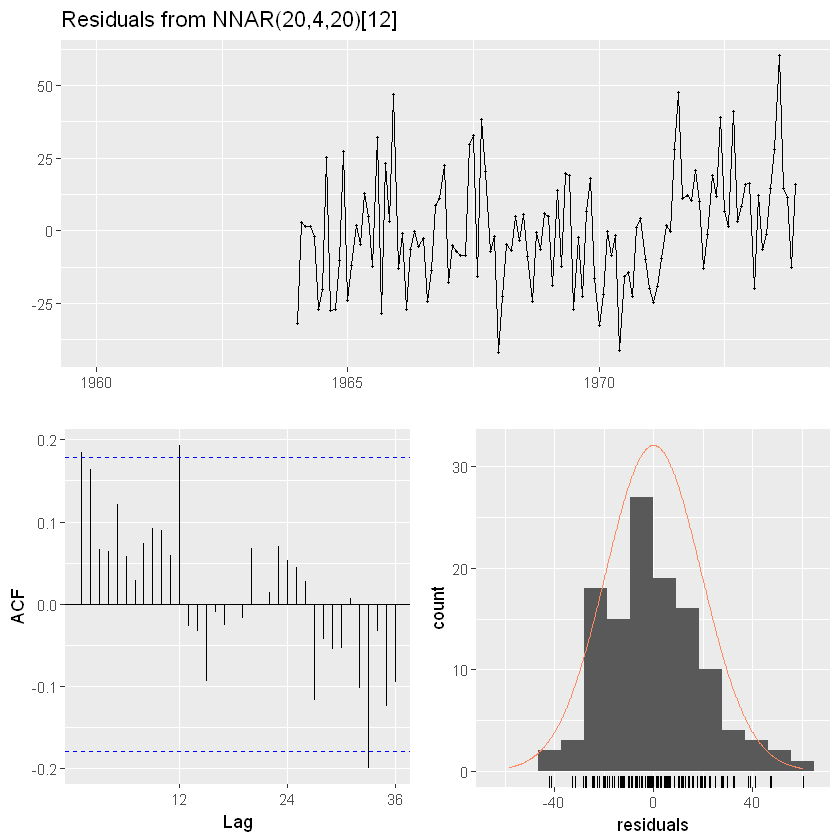

In [71]:
checkresiduals(model) # no hay grados de libertad

In [72]:
Box.test(model$residuals, lag = 12, type = 'Ljung-Box')


	Box-Ljung test

data:  model$residuals
X-squared = 19.482, df = 12, p-value = 0.07755


<br>

#### Técnicas ARIMA

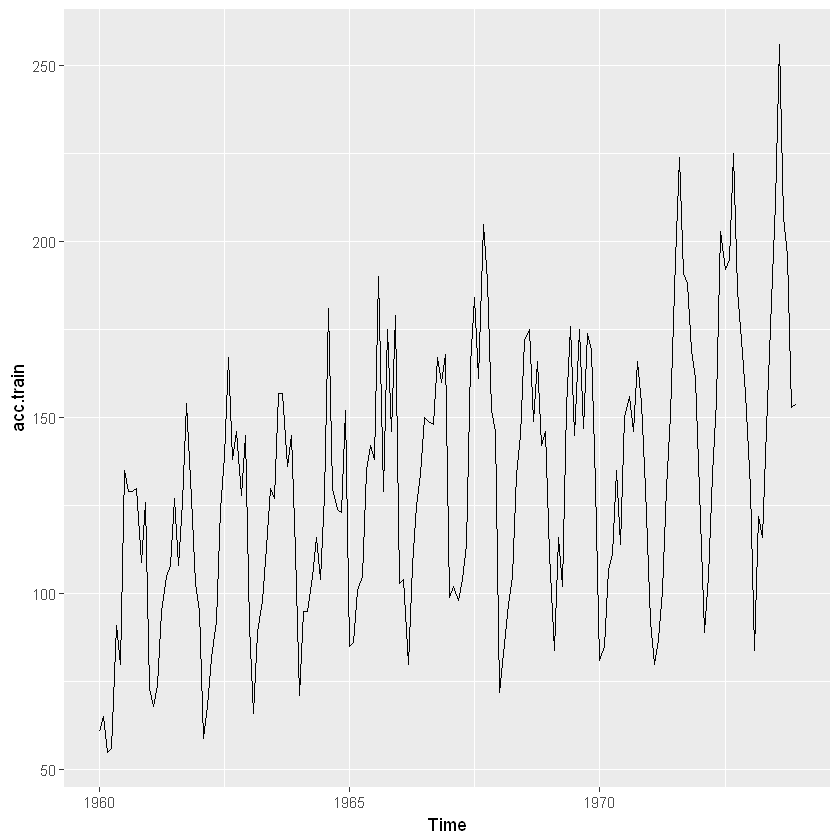

In [73]:
autoplot(acc.train)

<br>

#### Ajustamos la varianza con log y con Box Cox

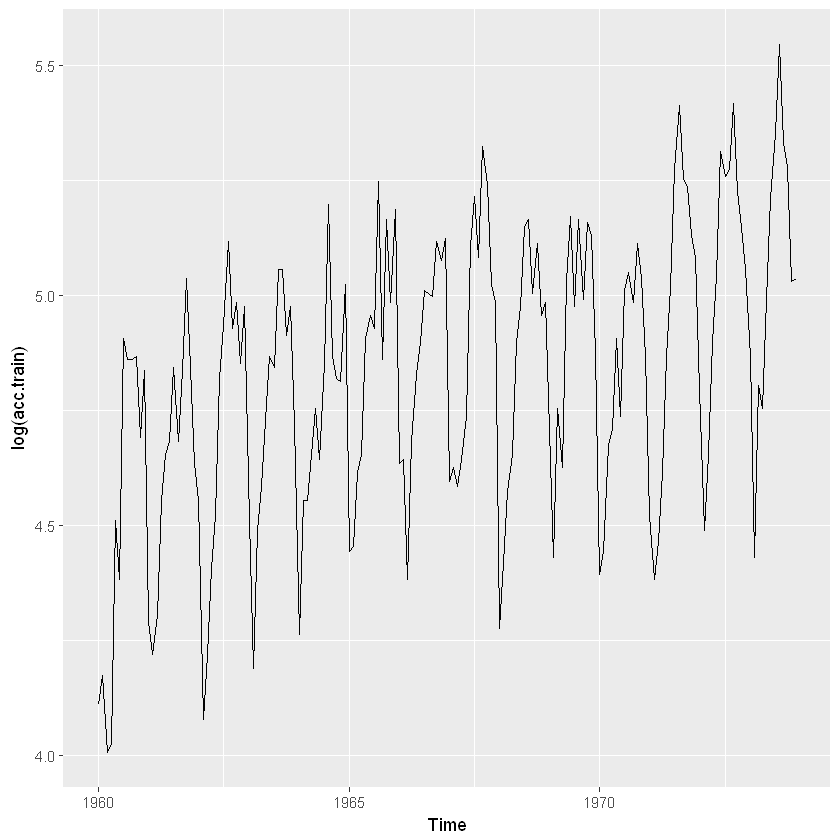

In [74]:
autoplot(log(acc.train))

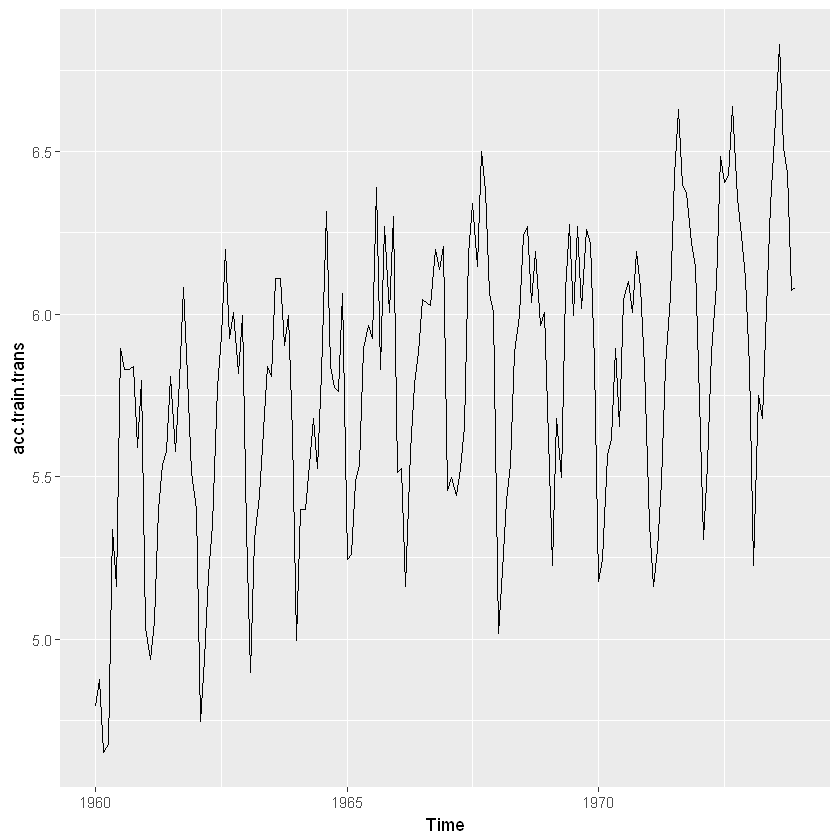

In [75]:
acc.train.trans <- BoxCox(acc.train, lambda = BoxCox.lambda(acc.train))
autoplot(acc.train.trans)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


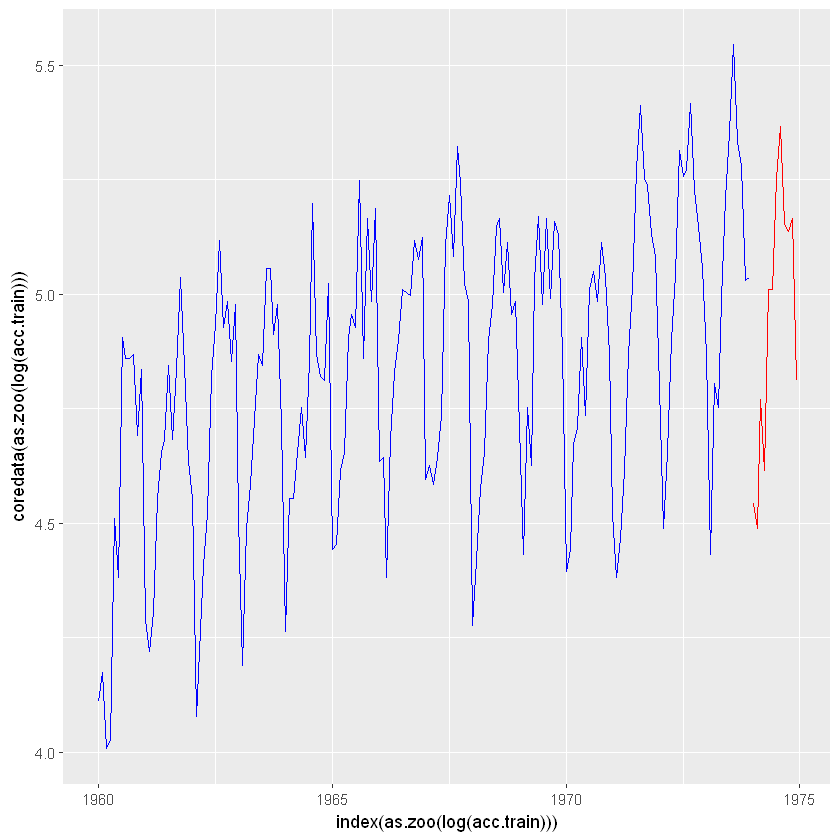

In [76]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(log(acc.train))), y = coredata(as.zoo(log(acc.train)))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(log(acc.test))), y = coredata(as.zoo(log(acc.test)))), col = 'red')
p

#### ¿Nuestra serie es estacionaria?

In [77]:
ndiffs(acc.train) # 1 

[1] 1

In [78]:
nsdiffs(acc.train) # 0

[1] 0

#### Diferenciamos la serie (no estacionalmente)

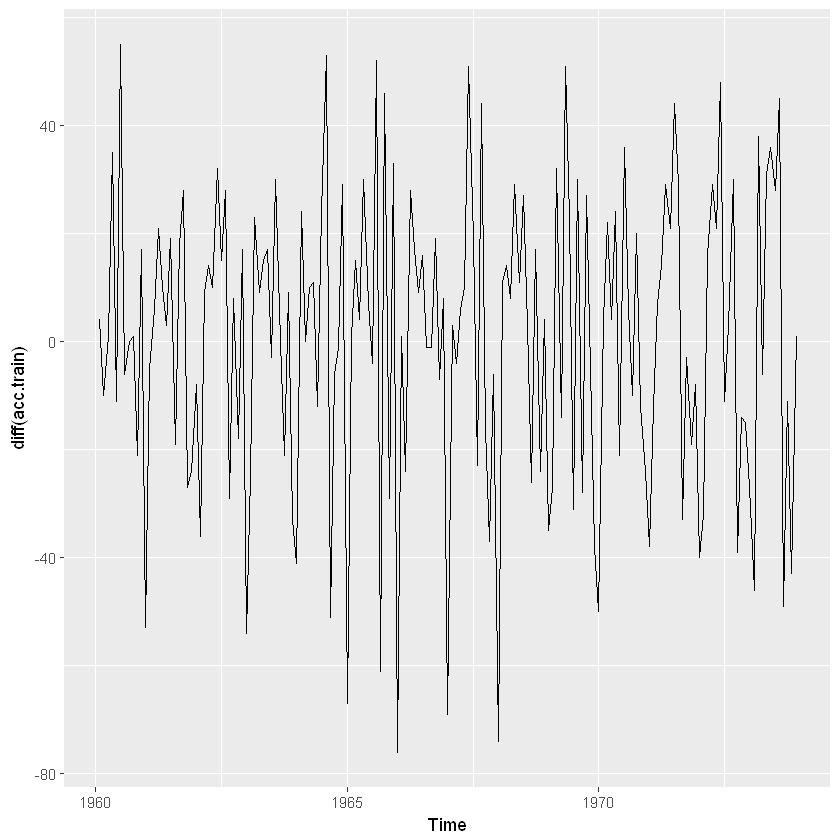

In [79]:
autoplot(diff(acc.train))

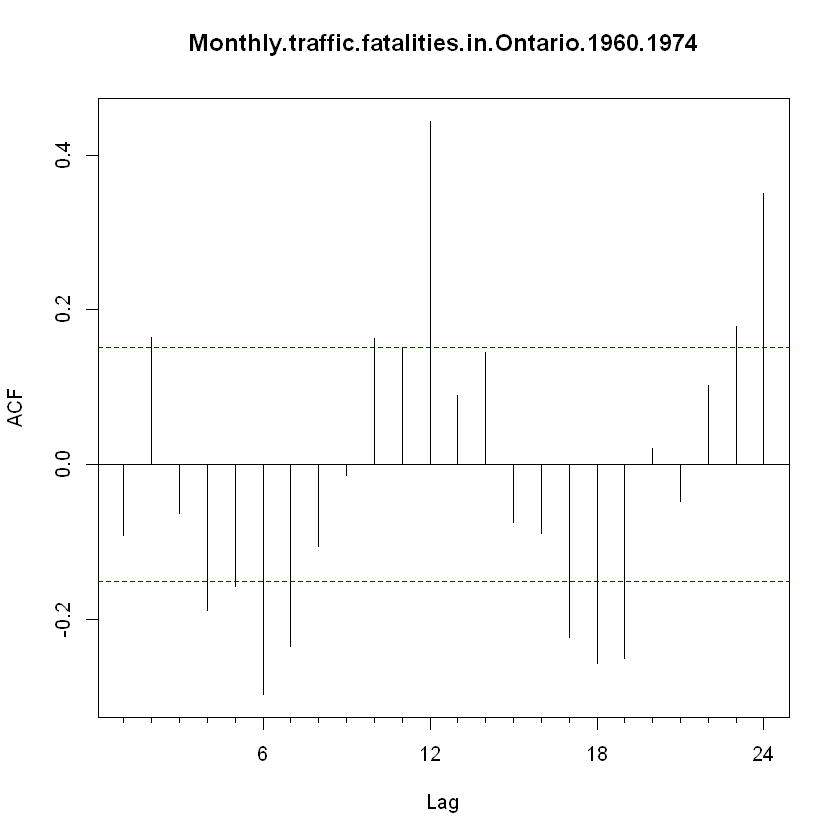

In [81]:
Acf(diff(acc.train)) # MA -> 0 | 2 (12)

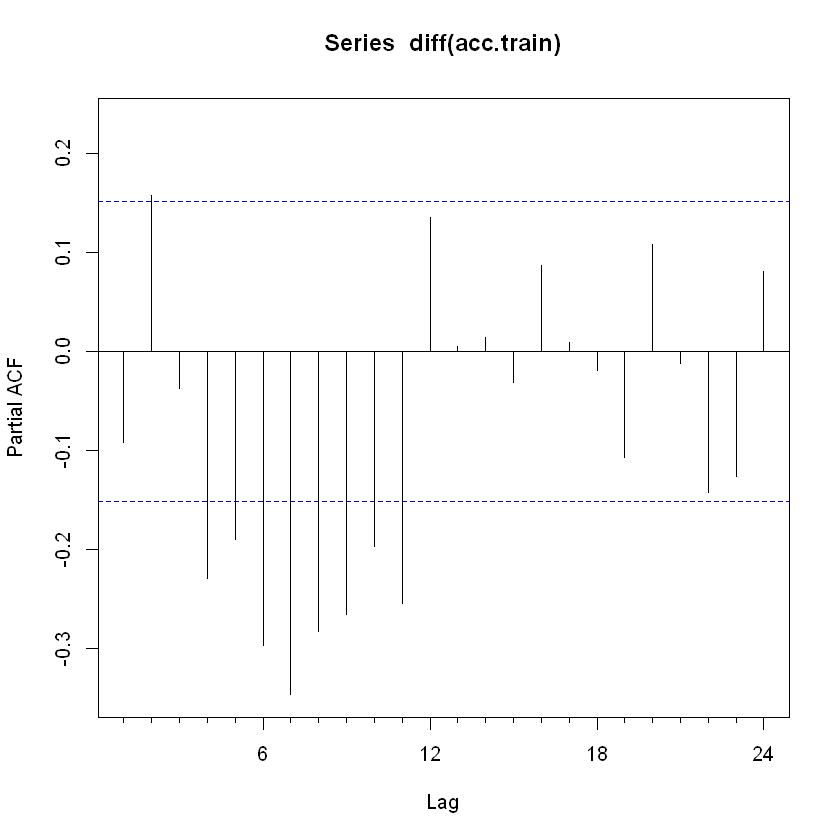

In [82]:
Pacf(diff(acc.train)) # AR -> 0 | 0 (12)

#### Ajustamos un SARIMA(0,1,0)(0,0,2)12

In [83]:
model <- Arima(acc.train, order = c(0,1,0), seasonal = c(0,0,2))
summary(model) # AIC = 1550.38

Series: acc.train 
ARIMA(0,1,0)(0,0,2)[12]                    

Coefficients:
        sma1    sma2
      0.3918  0.2472
s.e.  0.0788  0.0739

sigma^2 estimated as 605.1:  log likelihood=-772.19
AIC=1550.38   AICc=1550.53   BIC=1559.73

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 0.3068305 24.37856 19.84998 -1.632044 15.91416 1.119117 -0.2672489


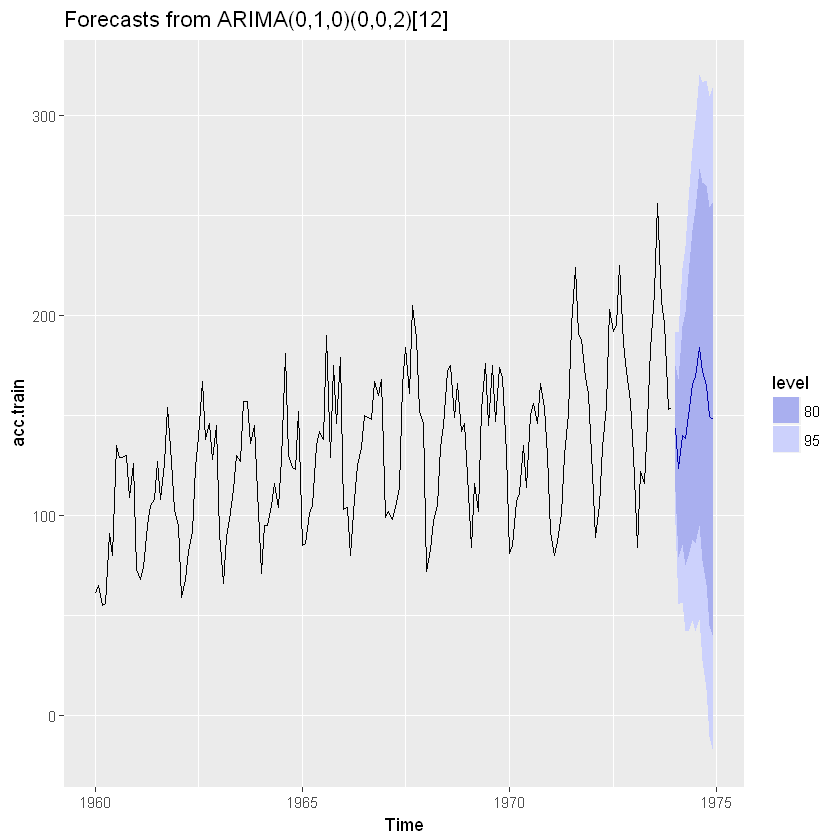

In [84]:
pred <- forecast(model, h = 12)
autoplot(pred)

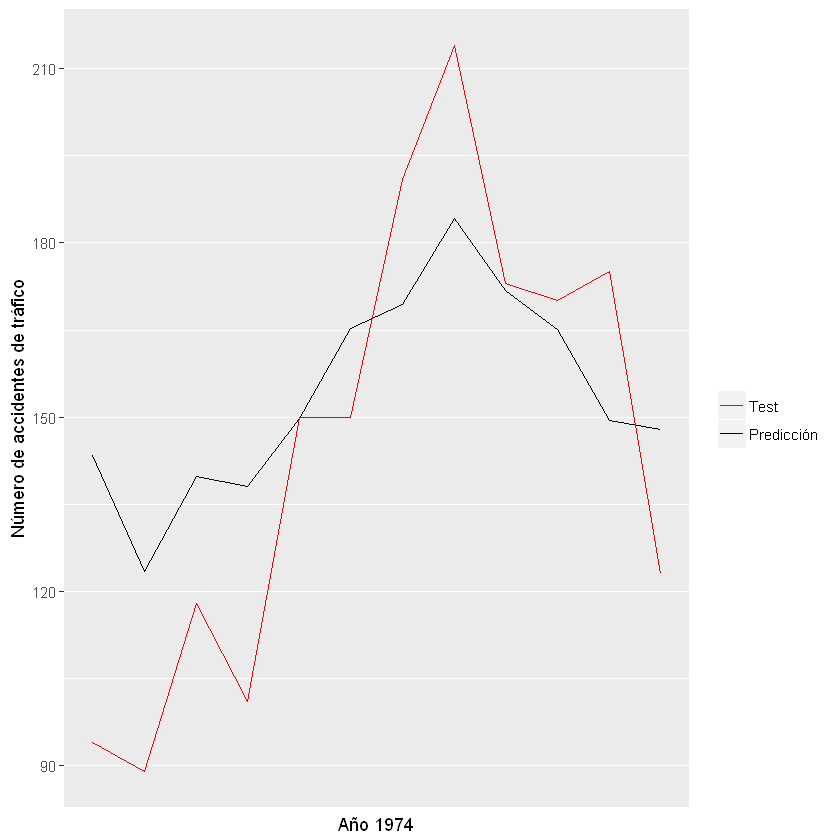

In [85]:
combine(pred$mean, acc.test)

In [86]:
accuracy(pred, acc.test) # MAE = 22.19949

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3068305,24.37856,19.84998,-1.632044,15.91416,1.119117,-0.2672489,NA
Test set,-8.3045984,26.42141,22.19949,-11.114019,18.38221,1.251579,0.3732364,0.8223204



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(0,0,2)[12]
Q* = 69.93, df = 22, p-value = 6.784e-07

Model df: 2.   Total lags used: 24



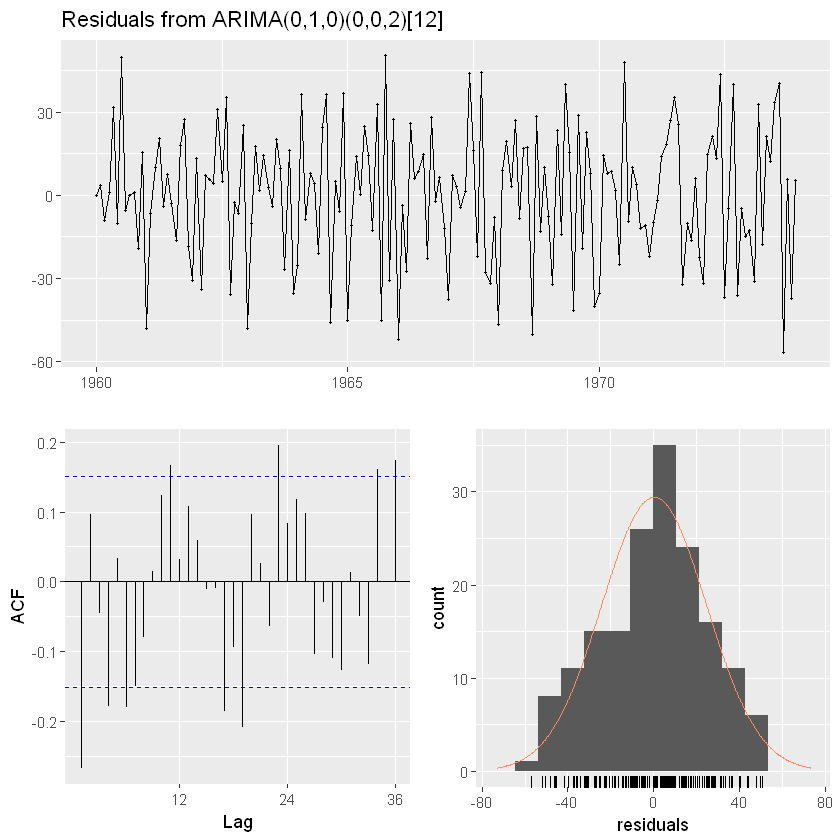

In [87]:
checkresiduals(model) # No son ruido blanco

<br>

#### Diferenciamos estacionalmente (se pierde la estacionalidad)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


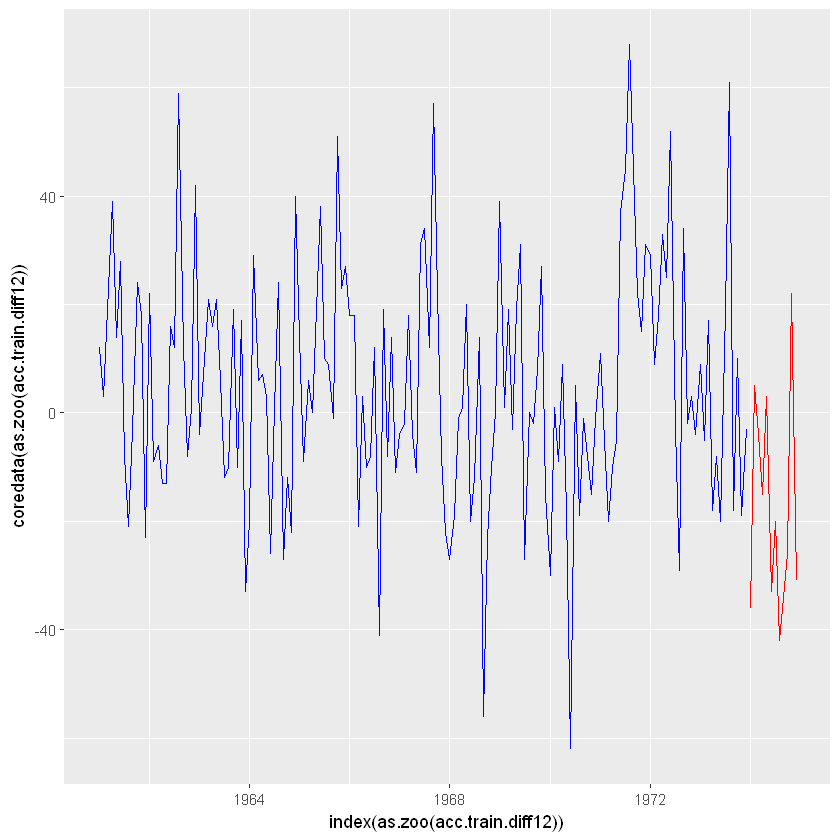

In [88]:
accidentes.diff12 <- diff(accidentes, 12) # perdemos un año de observaciones
acc.train.diff12 <- window(accidentes.diff12, start = c(1961,1), end = c(1973,12))
acc.test.diff12 <- window(accidentes.diff12, start = c(1974,1))
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.diff12)),
                y = coredata(as.zoo(acc.train.diff12))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(acc.test.diff12)),
                y = coredata(as.zoo(acc.test.diff12))), col = 'red')
p

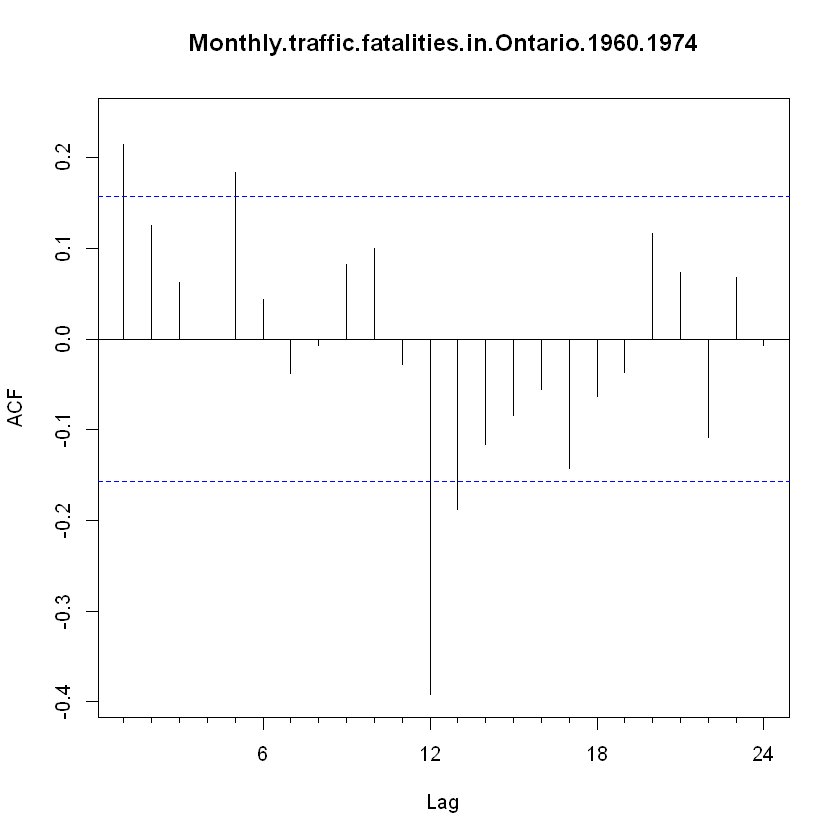

In [89]:
Acf(acc.train.diff12) # MA -> 1 | 1 (12)

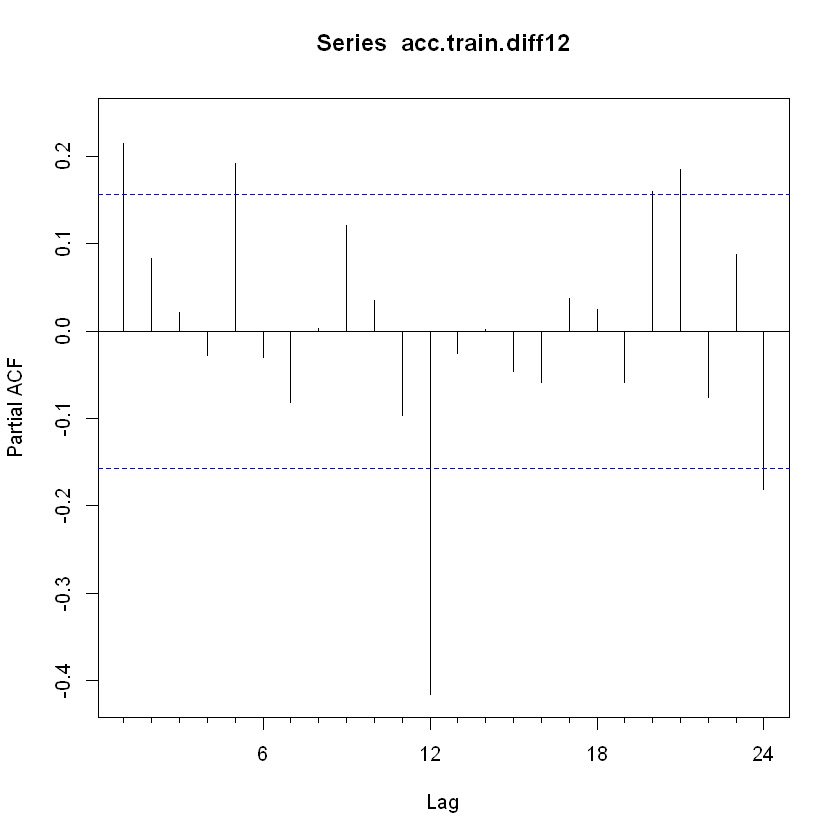

In [90]:
Pacf(acc.train.diff12) # AR -> 1 | 2 (12)

<br>

#### Ajustamos un SARIMA(1,0,1)(2,1,1)12 (Sin drift)

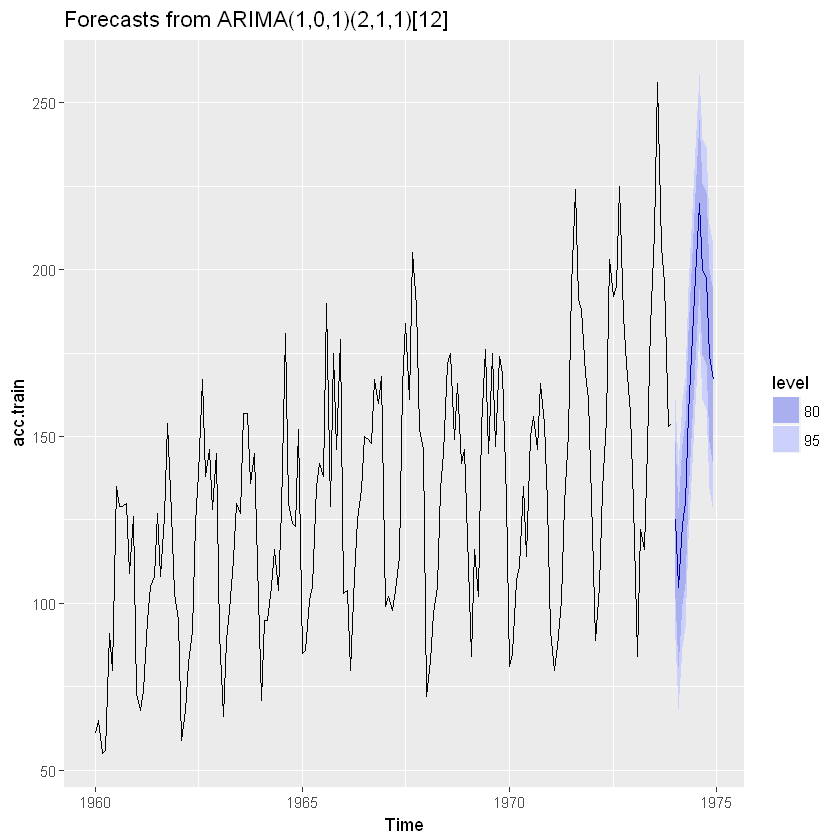

In [93]:
model <- Arima(acc.train, order = c(1,0,1), seasonal = c(2,1,1), include.drift = FALSE) 
pred <- forecast(model, h = 12)
autoplot(pred)

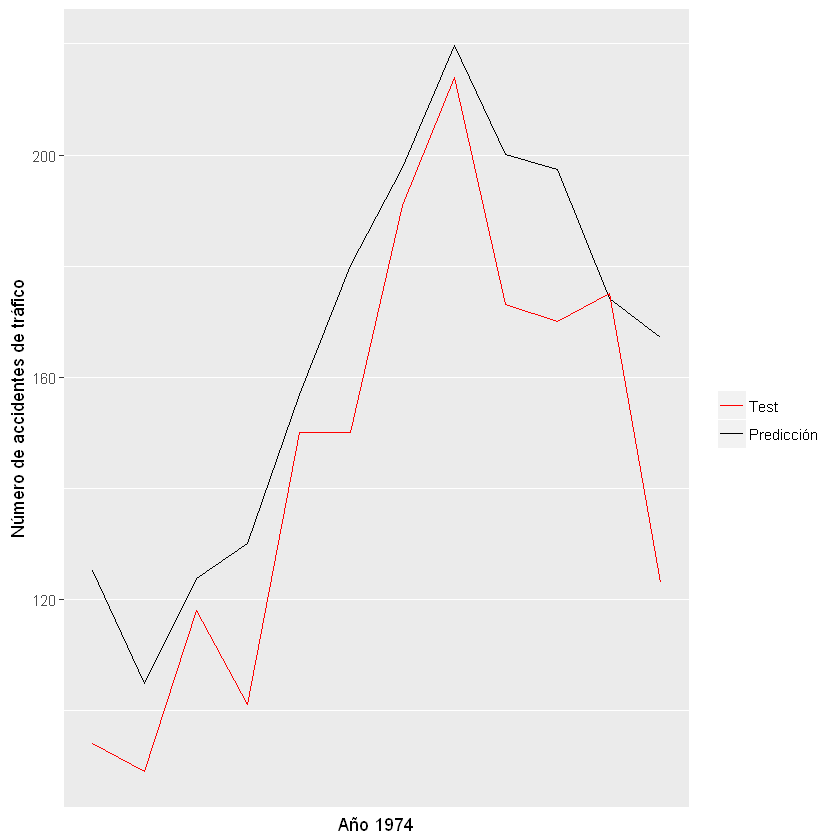

In [94]:
combine(pred$mean, acc.test)

In [95]:
accuracy(pred, acc.test) # MAE = 19.22651

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.469444,17.40930,12.95529,-0.3041653,9.953132,0.7304031,0.09781487,NA
Test set,-19.074259,23.38189,19.22651,-15.2036291,15.290632,1.0839668,-0.48541255,0.6503494



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,1)[12]
Q* = 30.731, df = 19, p-value = 0.04321

Model df: 5.   Total lags used: 24



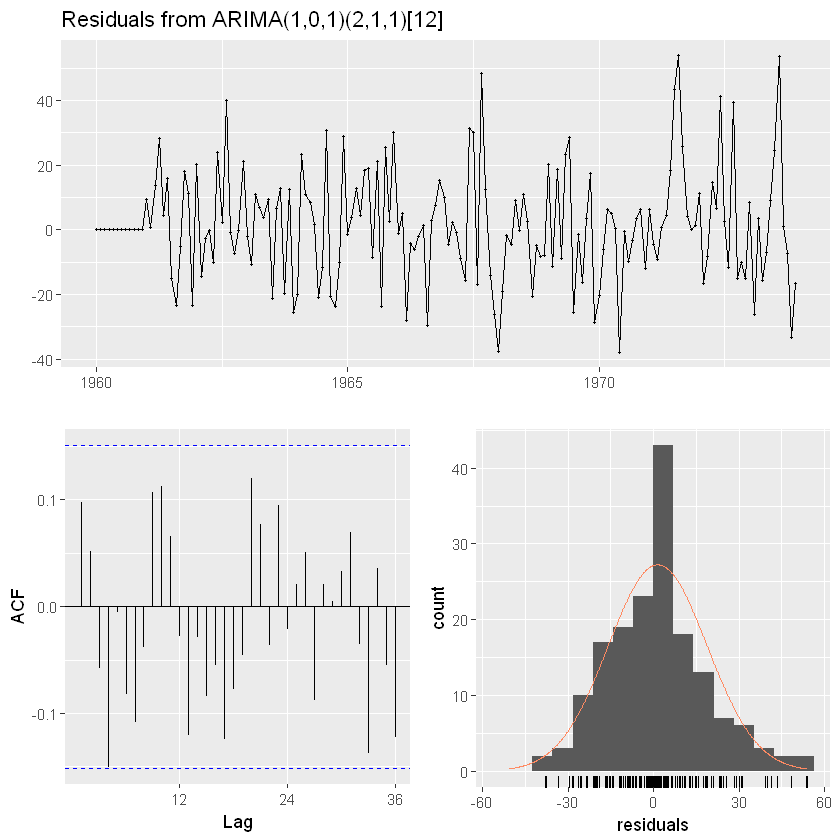

In [96]:
checkresiduals(model) # 0.04321 No ruido blanco

<br>

#### Ajustamos un SARIMA(1,0,1)(2,1,1)12 (Con drift)

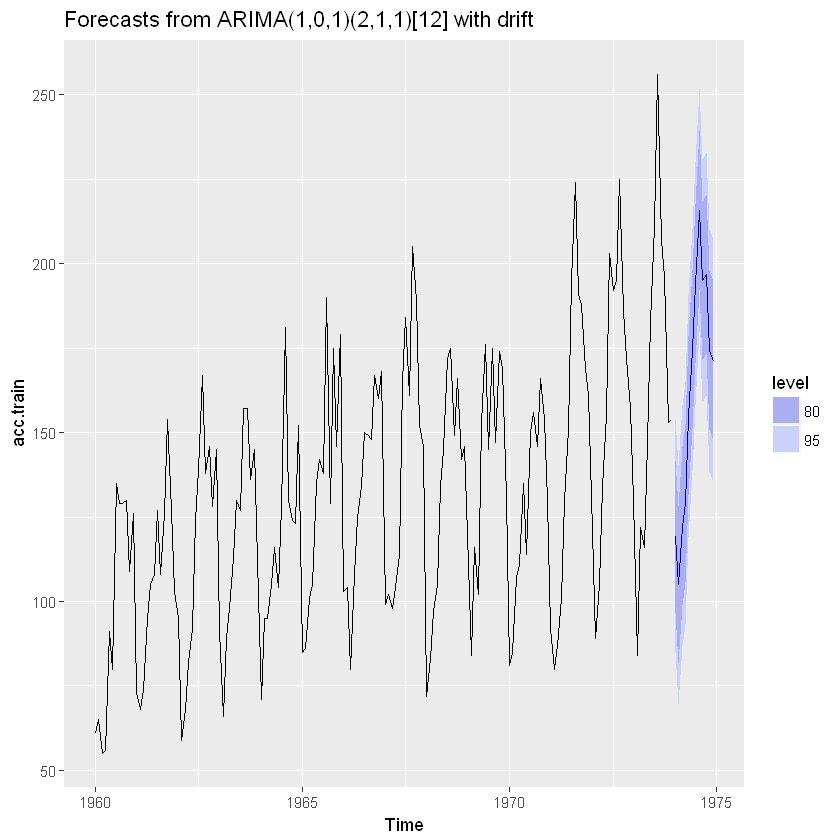

In [97]:
model <- Arima(acc.train, order = c(1,0,1), seasonal = c(2,1,1), include.drift = TRUE) 
pred <- forecast(model, h = 12)
autoplot(pred)

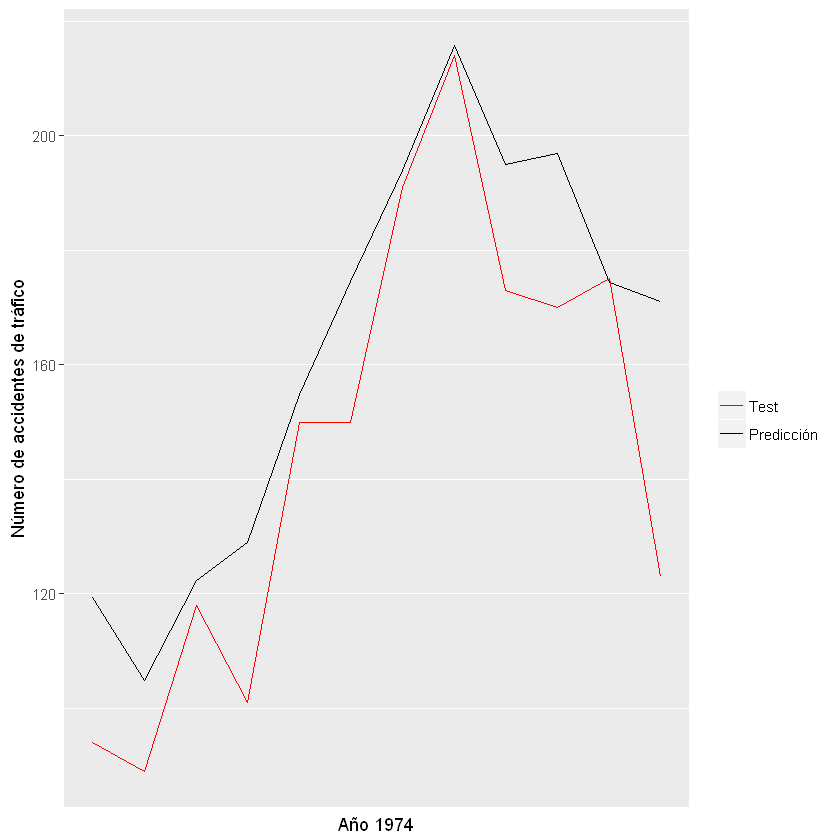

In [98]:
combine(pred$mean, acc.test)

In [99]:
accuracy(pred, acc.test) # MAE = 17.0999

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.5676732,16.49563,12.44373,-0.944418,9.634101,0.7015622,-0.01411564,NA
Test set,-17.0007824,22.09167,17.09992,-13.788652,13.845303,0.9640722,-0.41828308,0.6255795



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,1)[12] with drift
Q* = 21.091, df = 18, p-value = 0.2748

Model df: 6.   Total lags used: 24



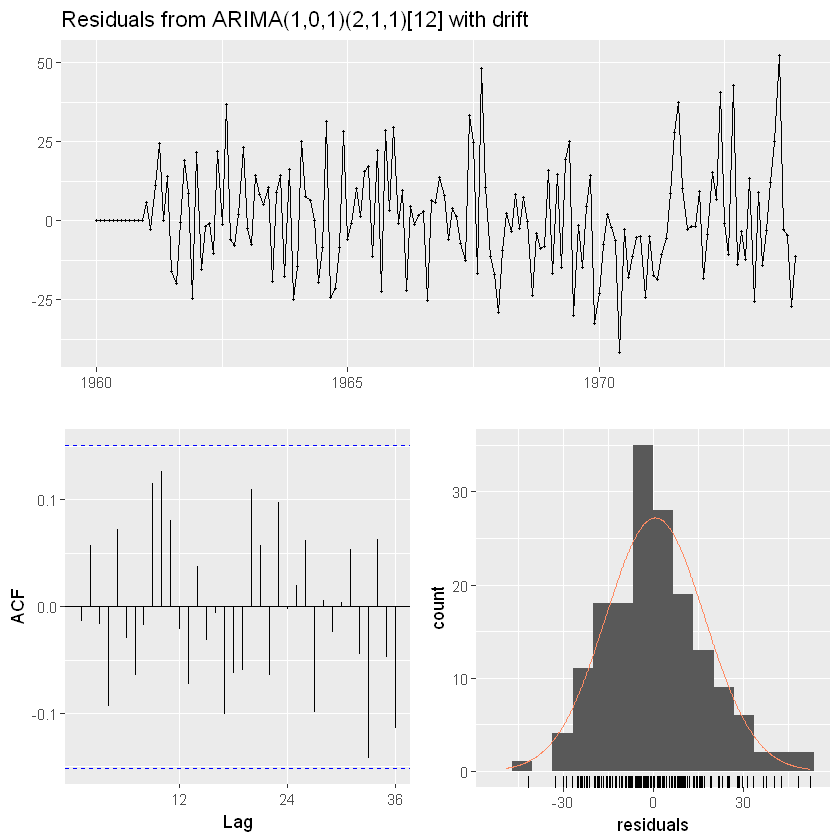

In [100]:
checkresiduals(model) # 0.2748 Ruido blanco

<br>

#### Selección automática del modelo (SARIMA(1,0,0)(1,0,0)12)

In [101]:
model <- auto.arima(acc.train, test = 'adf')
summary(model) # AIC = 1514.22

Series: acc.train 
ARIMA(1,0,0)(1,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1      mean
      0.4595  0.6948  130.7275
s.e.  0.0880  0.0738    8.4589

sigma^2 estimated as 444.6:  log likelihood=-753.11
AIC=1514.22   AICc=1514.47   BIC=1526.72

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 1.481911 20.89727 16.32299 -2.080903 13.43304 0.9202698 -0.0813211


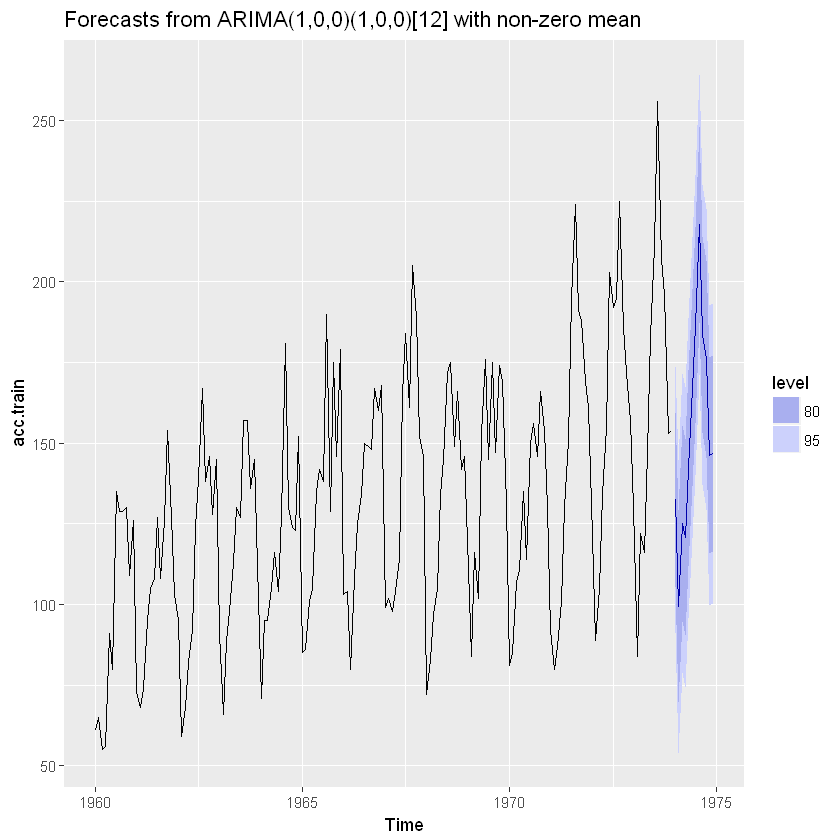

In [102]:
pred <- forecast(model, h = 12)
autoplot(pred)

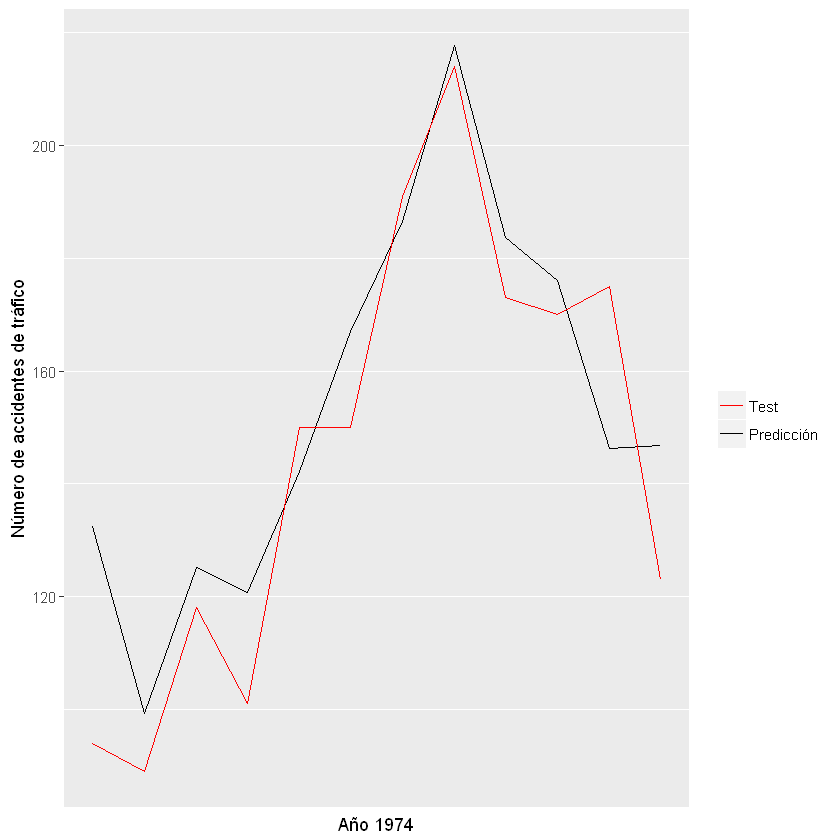

In [103]:
combine(pred$mean, acc.test[1:12])

In [104]:
accuracy(pred, acc.test) # MAE = 14.86938

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.481911,20.89727,16.32299,-2.080903,13.43304,0.9202698,-0.0813211,NA
Test set,-8.013324,18.19253,14.86938,-8.041157,12.04800,0.8383172,-0.2694620,0.4505771



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,0,0)[12] with non-zero mean
Q* = 47.319, df = 21, p-value = 0.0008506

Model df: 3.   Total lags used: 24



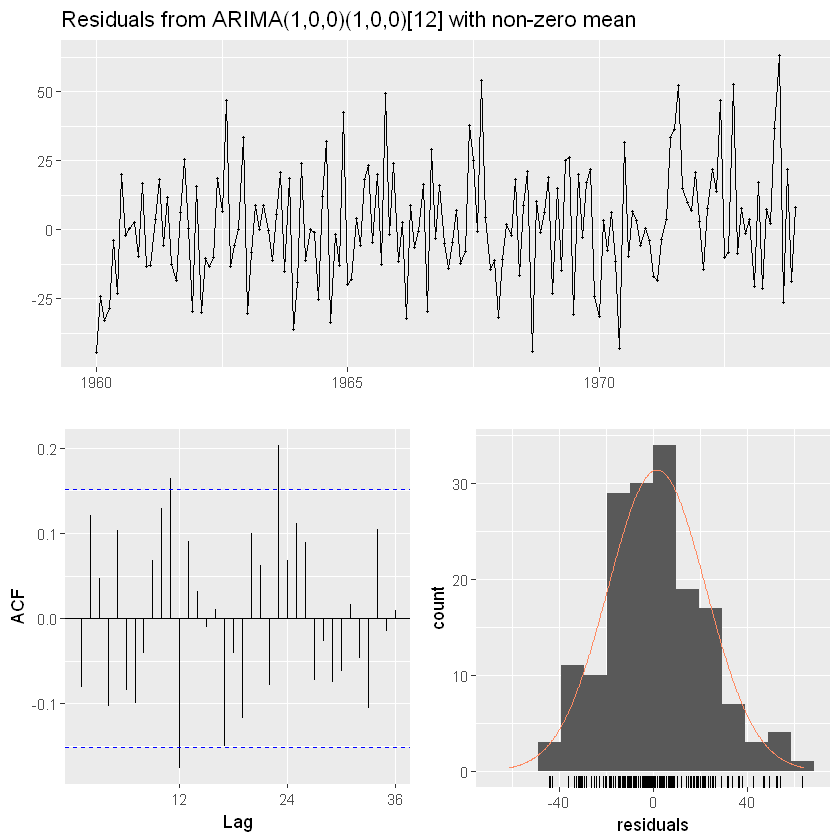

In [105]:
checkresiduals(model) # No son ruido blanco

<br>

#### Selección automática del modelo (sin ahorrar coste computacional) (SARIMA (2,0,0)(2,0,0)12)

In [106]:
model <- auto.arima(acc.train, test = 'adf', max.order = 7, stepwise = FALSE, approximation = FALSE)
summary(model) # AICc = 1499.24

Series: acc.train 
ARIMA(2,0,0)(2,0,0)[12] with non-zero mean 

Coefficients:
         ar1     ar2    sar1    sar2      mean
      0.3310  0.2098  0.4852  0.3263  130.4488
s.e.  0.0827  0.0765  0.0774  0.0804   12.6991

sigma^2 estimated as 393.4:  log likelihood=-743.62
AIC=1499.24   AICc=1499.77   BIC=1517.99

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 2.151158 19.53816 15.07484 -0.9899178 12.21712 0.8499005
                    ACF1
Training set -0.02670233


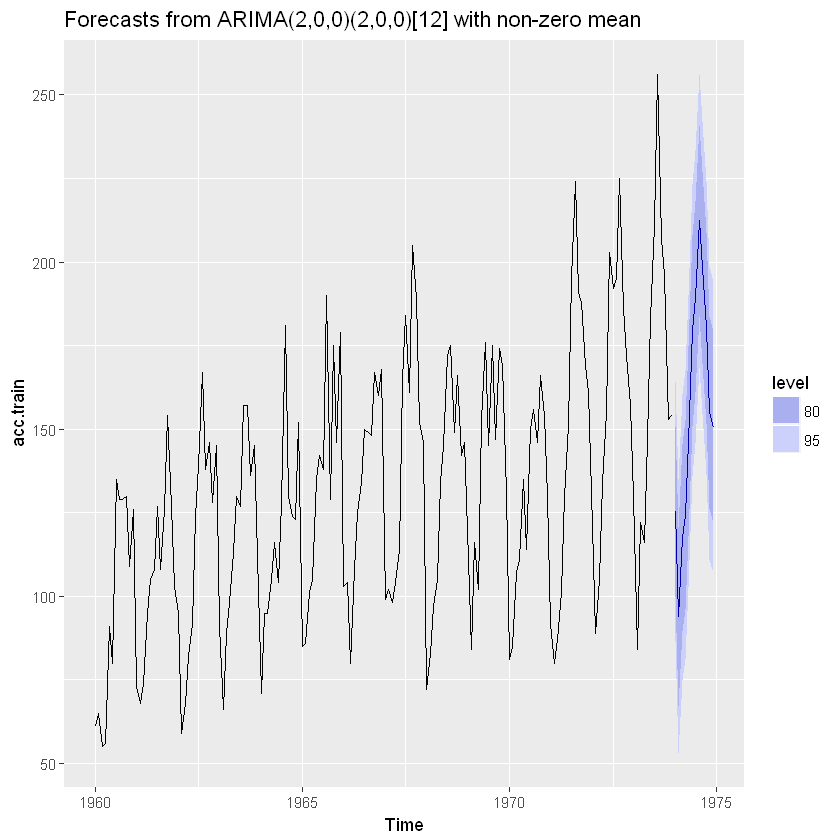

In [107]:
pred <- forecast(model, h = 12)
autoplot(pred)

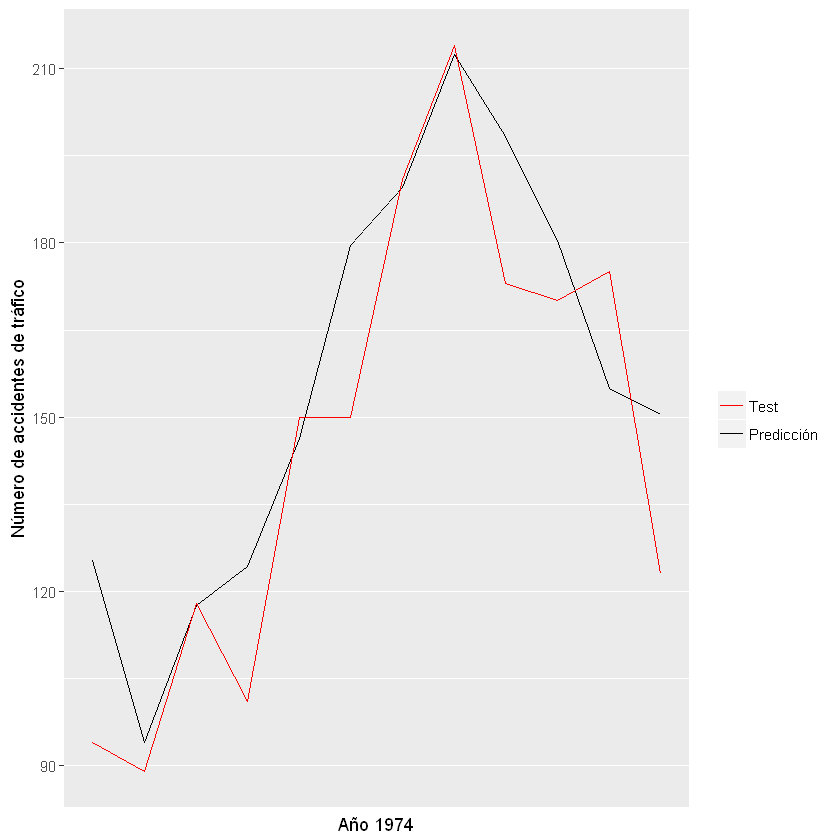

In [108]:
combine(pred$mean, acc.test)

In [109]:
accuracy(pred, acc.test) # MAE = 14.96979

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.151158,19.53816,15.07484,-0.9899178,12.21712,0.8499005,-0.02670233,NA
Test set,-10.402322,19.02877,14.96979,-9.0604023,11.71312,0.8439780,-0.47027508,0.4881124



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0)(2,0,0)[12] with non-zero mean
Q* = 40.624, df = 19, p-value = 0.002708

Model df: 5.   Total lags used: 24



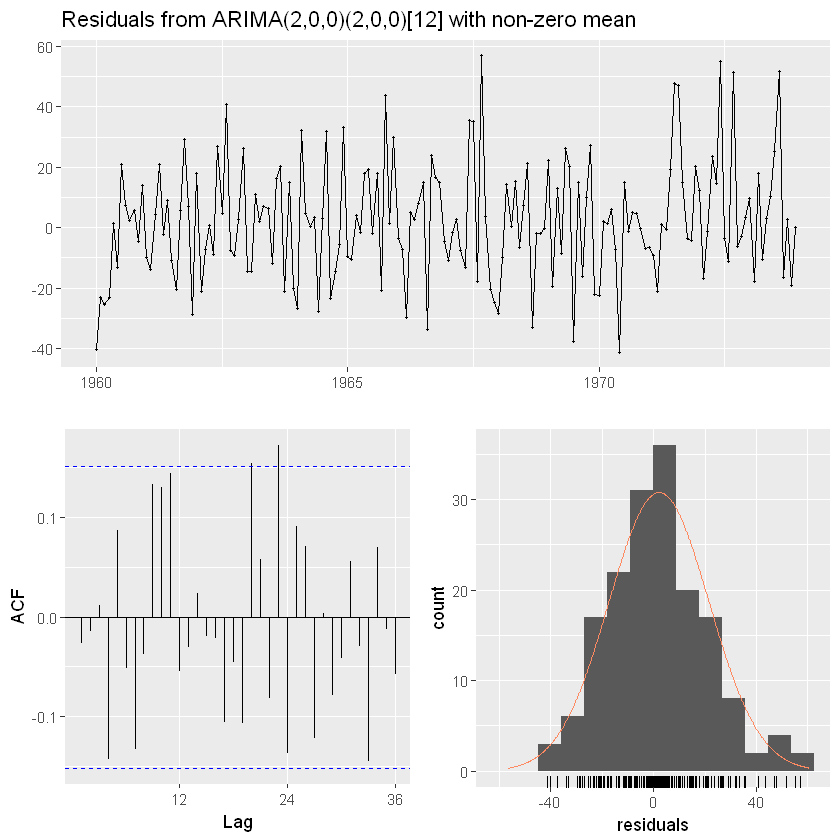

In [110]:
checkresiduals(model) # No son ruido blanco

<br>

#### Selección automática del modelo (sin ahorrar coste computacional) (SARIMA (1,1,4)(2,0,0)12)

In [111]:
model <- auto.arima(acc.train, max.order = 7, stepwise = FALSE, approximation = FALSE)
summary(model) # AICc = 1485.29

Series: acc.train 
ARIMA(1,1,4)(2,0,0)[12]                    

Coefficients:
          ar1     ma1      ma2      ma3      ma4    sar1    sar2
      -0.6778  0.0114  -0.4697  -0.1483  -0.2960  0.4631  0.3398
s.e.   0.2153  0.2017   0.1660   0.0772   0.0829  0.0785  0.0802

sigma^2 estimated as 377:  log likelihood=-734.65
AIC=1485.29   AICc=1486.2   BIC=1510.24

Training set error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 2.379826 18.94959 14.58401 -0.06474681 11.39818 0.8222284
                    ACF1
Training set -0.02640928


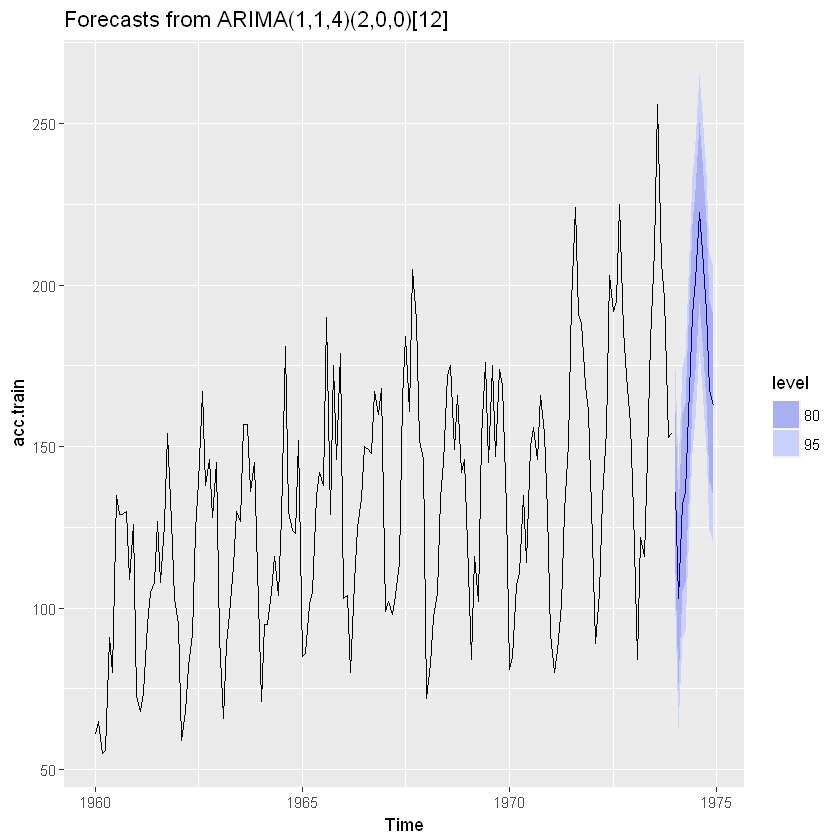

In [112]:
pred <- forecast(model, h = 12)
autoplot(pred)

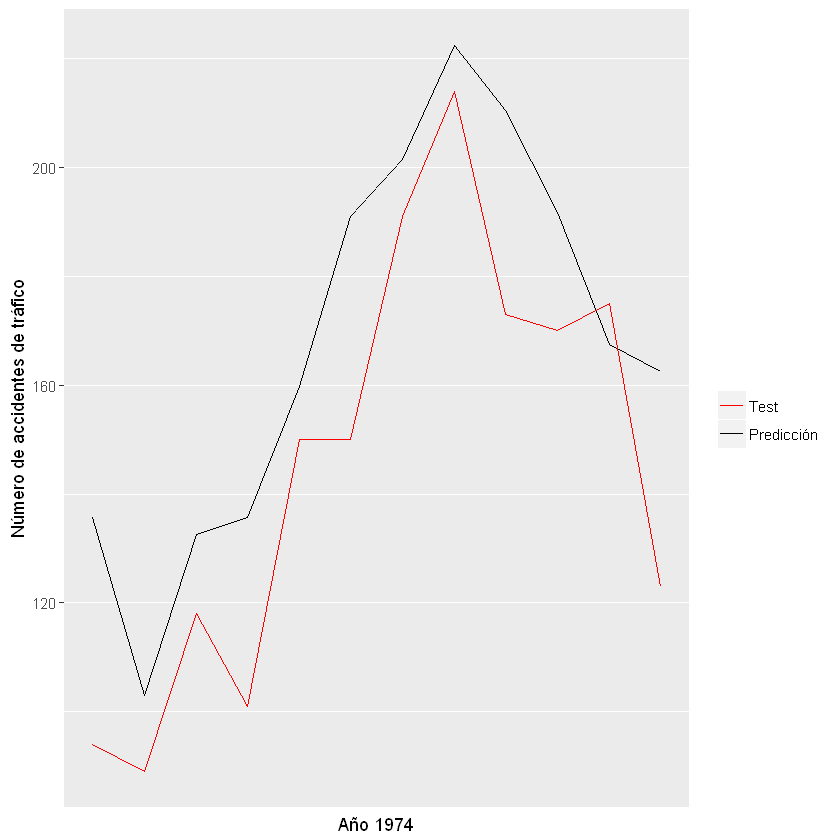

In [113]:
combine(pred$mean, acc.test)

In [116]:
accuracy(pred, acc.test) # MAE = 23.44705

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.379826,18.94959,14.58401,-0.06474681,11.39818,0.8222284,-0.02640928,NA
Test set,-22.183257,27.12400,23.44705,-17.71587342,18.43804,1.3219152,-0.46678224,0.7497104



	Ljung-Box test

data:  Residuals from ARIMA(1,1,4)(2,0,0)[12]
Q* = 32.371, df = 17, p-value = 0.01353

Model df: 7.   Total lags used: 24



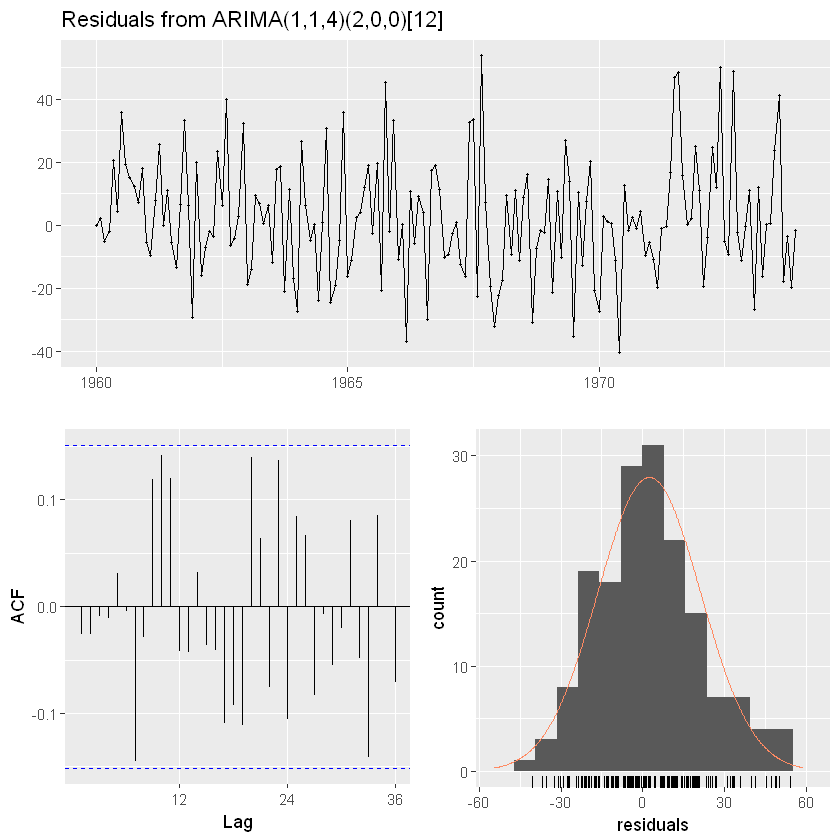

In [117]:
checkresiduals(model) # No son ruido blanco